#  <span style="font-family: Latin Modern Roman; font-size: 35px; font-weight: bold;"> Final Project. Credit Card Customer Segmentation</span>

<p align="center" style="display: block; max-width: 100%;">
  <img src="https://media.istockphoto.com/id/1367581709/vector/credit-card-icon.jpg?s=612x612&w=0&k=20&c=wTyQsDnKyN2YRbUMaqjcJEfLXShNoTx9fUqnPOZCqes=" style="max-width: 22%; height: auto;">
</p>


---

## <span style="font-family: Latin Modern Roman; font-size: 25px;"> 1. Exploratory Data Analysis </span>


In [1]:
import pandas as pd

df = pd.read_csv('./BankChurners.csv', header = 0)
df = df[df.columns[:-2]]
df.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0              39  ...                       1                      3   
1              44  ...                       1                      2   
2              36  ...                       1                      0   
3              34  ...                       4                      1   
4              21  ...                       1                      0   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0       12691.0                  777          11914.0                 1.335   
1        8256.0                  864           7392.0                 1.541   
2        3418.0                    0           3418.0                 2.594   
3        3313.0                 2517            796.0                 1.405   
4        4716.0                    0           4716.0                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  
3             1171              20                2.333                  0.760  
4              816              28                2.500                  0.000  

[5 rows x 21 columns]

In [2]:
df_info = pd.DataFrame(df.dtypes, columns = ['Dtype'])
df_info = df_info.iloc[:, :-2]
df_info['Unique'] = df.nunique().values
df_info['Null'] = df.isnull().sum().values
df_info

Unique  Null
CLIENTNUM                  10127     0
Attrition_Flag                 2     0
Customer_Age                  45     0
Gender                         2     0
Dependent_count                6     0
Education_Level                7     0
Marital_Status                 4     0
Income_Category                6     0
Card_Category                  4     0
Months_on_book                44     0
Total_Relationship_Count       6     0
Months_Inactive_12_mon         7     0
Contacts_Count_12_mon          7     0
Credit_Limit                6205     0
Total_Revolving_Bal         1974     0
Avg_Open_To_Buy             6813     0
Total_Amt_Chng_Q4_Q1        1158     0
Total_Trans_Amt             5033     0
Total_Trans_Ct               126     0
Total_Ct_Chng_Q4_Q1          830     0
Avg_Utilization_Ratio        964     0

In [3]:
df.duplicated().sum()

0

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

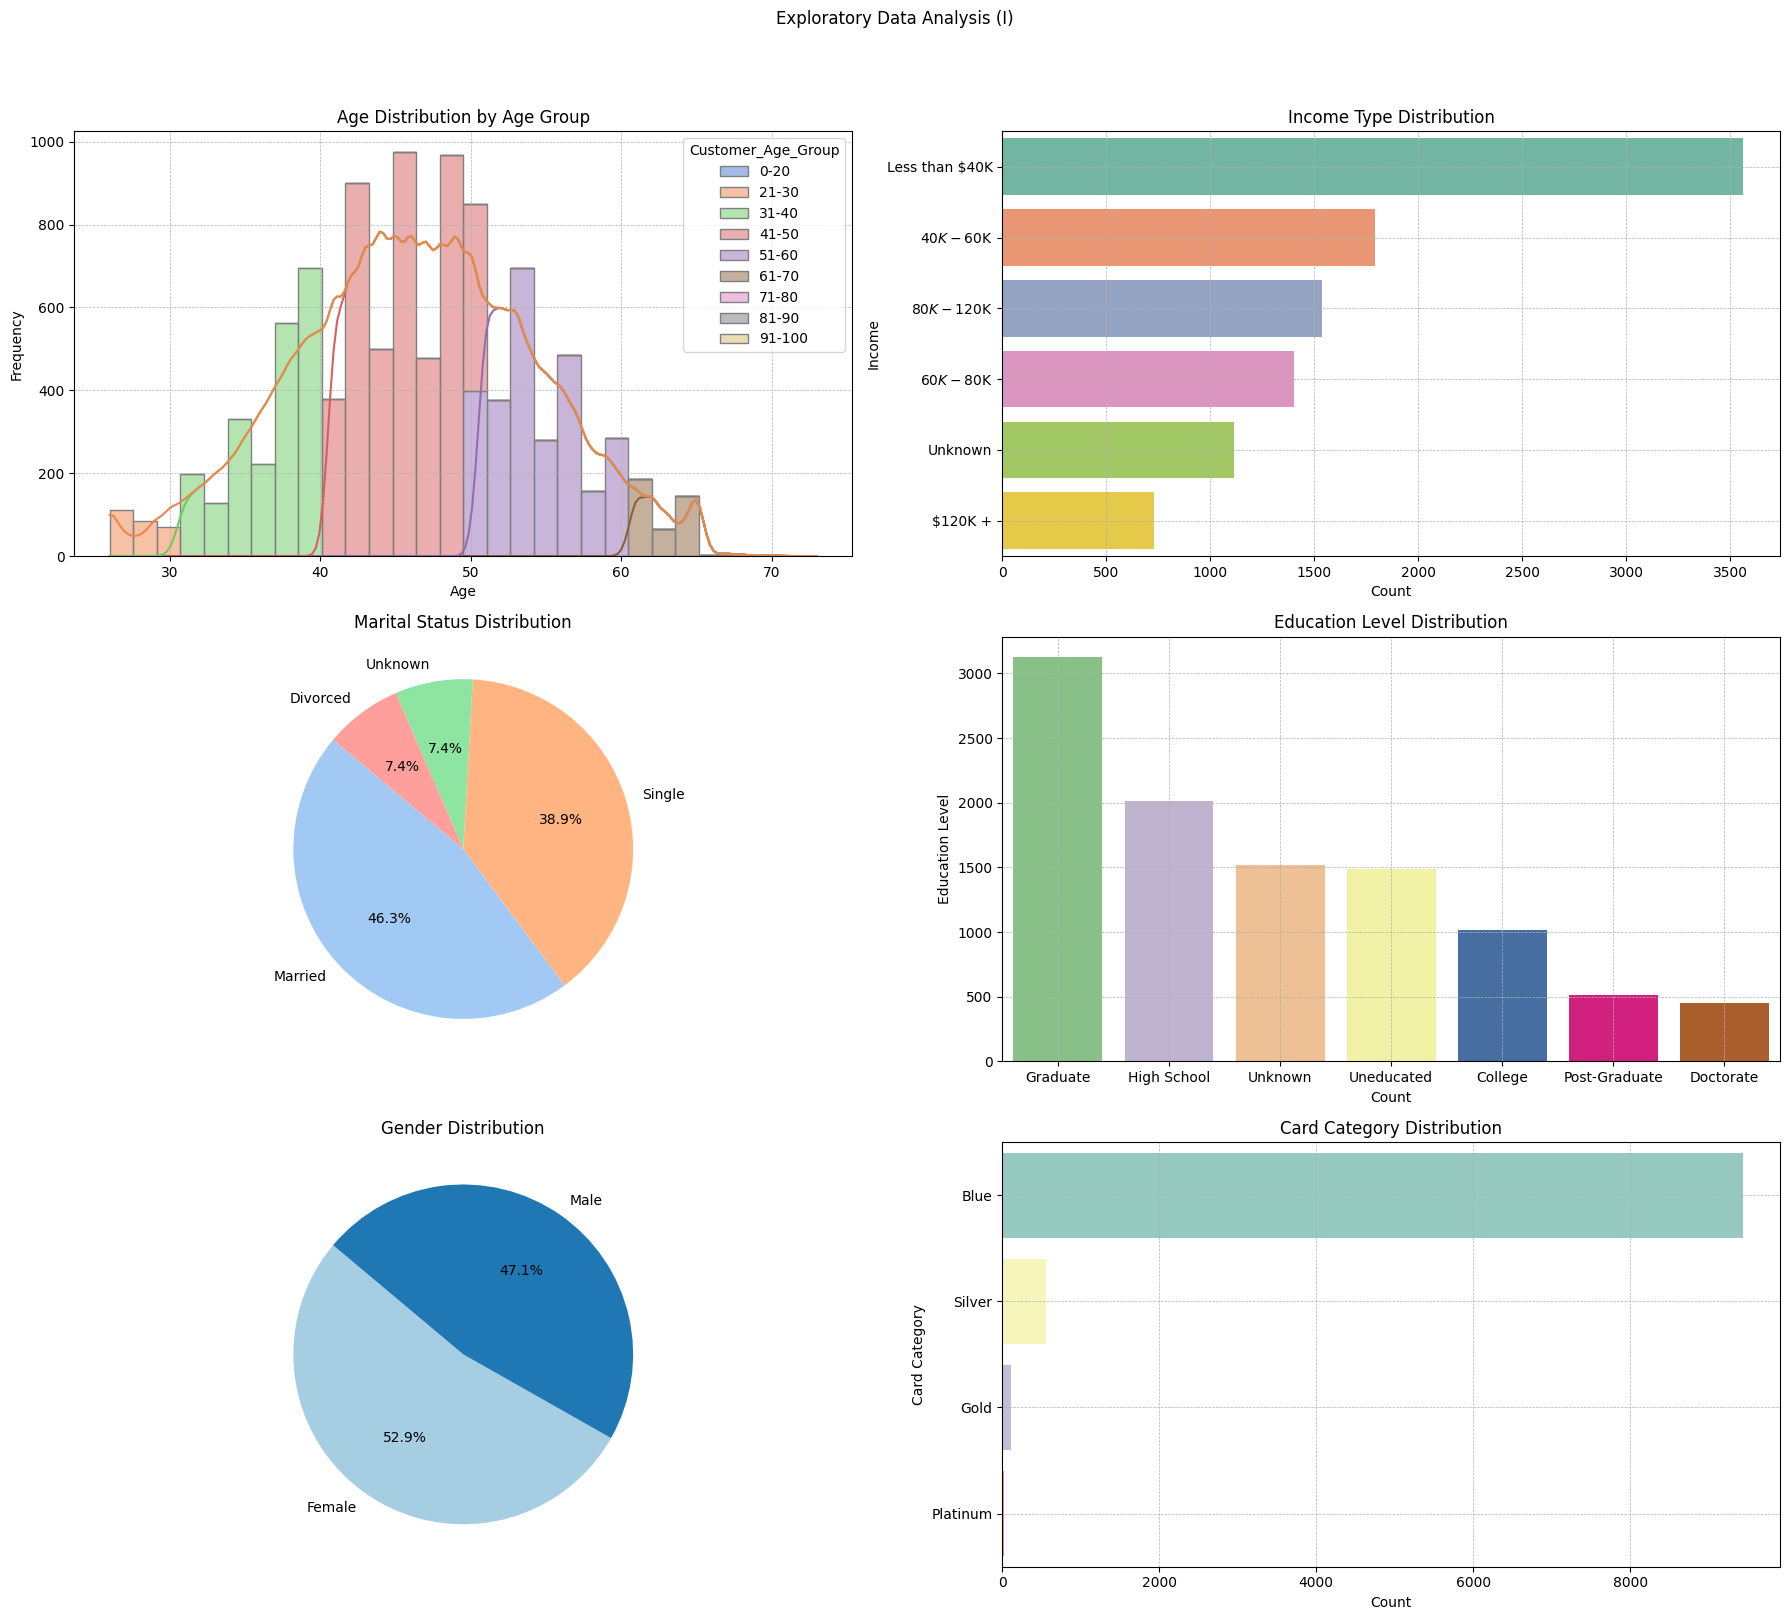

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings

warnings.filterwarnings("ignore")

# Subplot area
fig, axes = plt.subplots(3, 2, figsize = (18, 17))
fig.suptitle('Exploratory Data Analysis (I)')

# Age Distribution by Age Group
age_bins = ['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']
df['Customer_Age_Group'] = pd.cut(df['Customer_Age'], bins = [0, 20, 30, 40, 50, 60, 70, 80, 90, 100], labels = age_bins)
sns.histplot(data=df, x = 'Customer_Age', hue = 'Customer_Age_Group', multiple = 'stack', palette = 'muted', edgecolor = 'gray', ax = axes[0, 0], bins = 30, kde = True)
axes[0, 0].set_title('Age Distribution by Age Group')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].grid(True, which = "both", ls = "--", linewidth = 0.5)

# Income Type Distribution
job_types = df['Income_Category'].value_counts().index
colors = sns.color_palette("Set2", len(job_types))
for i, income in enumerate(job_types):
    sns.barplot(x=[df[df['Income_Category'] == income]['Income_Category'].count()], y = [income], ax = axes[0, 1], color = colors[i])
axes[0, 1].set_title('Income Type Distribution')
axes[0, 1].set_xlabel('Count')
axes[0, 1].set_ylabel('Income')
axes[0, 1].grid(True, which = "both", ls = "--", linewidth = 0.5)

# Marital Status Distribution
marital_counts = df['Marital_Status'].value_counts()
axes[1, 0].pie(marital_counts, labels = marital_counts.index, autopct = '%1.1f%%', startangle = 140, colors = sns.color_palette("pastel", len(marital_counts)))
axes[1, 0].set_title('Marital Status Distribution')

# Education Level Distribution
sns.countplot(x = 'Education_Level', data = df, order = df['Education_Level'].value_counts().index, ax = axes[1, 1], palette = 'Accent')
axes[1, 1].set_title('Education Level Distribution')
axes[1, 1].set_xlabel('Count')
axes[1, 1].set_ylabel('Education Level')
axes[1, 1].tick_params(axis = 'x', labelsize = 'medium')
axes[1, 1].grid(True, which = "both", ls = "--", linewidth = 0.5)

# Gender Status Distribution
gender_counts = df['Gender'].value_counts()
axes[2, 0].pie(gender_counts, labels = gender_counts.index.map({'F': 'Female', 'M': 'Male'}), autopct = '%1.1f%%', startangle = 140, colors = sns.color_palette("Paired", len(gender_counts)))
axes[2, 0].set_title('Gender Distribution')

# Card Category Distribution
card_category = df['Card_Category'].value_counts().index
colors = sns.color_palette("Set3", len(job_types))
for i, card in enumerate(card_category):
    sns.barplot(x=[df[df['Card_Category'] == card]['Card_Category'].count()], y = [card], ax = axes[2, 1], color = colors[i])
axes[2, 1].set_title('Card Category Distribution')
axes[2, 1].set_xlabel('Count')
axes[2, 1].set_ylabel('Card Category')
axes[2, 1].grid(True, which = "both", ls = "--", linewidth = 0.5)

plt.tight_layout(rect = [0, 0.03, 1, 0.95])
plt.show()

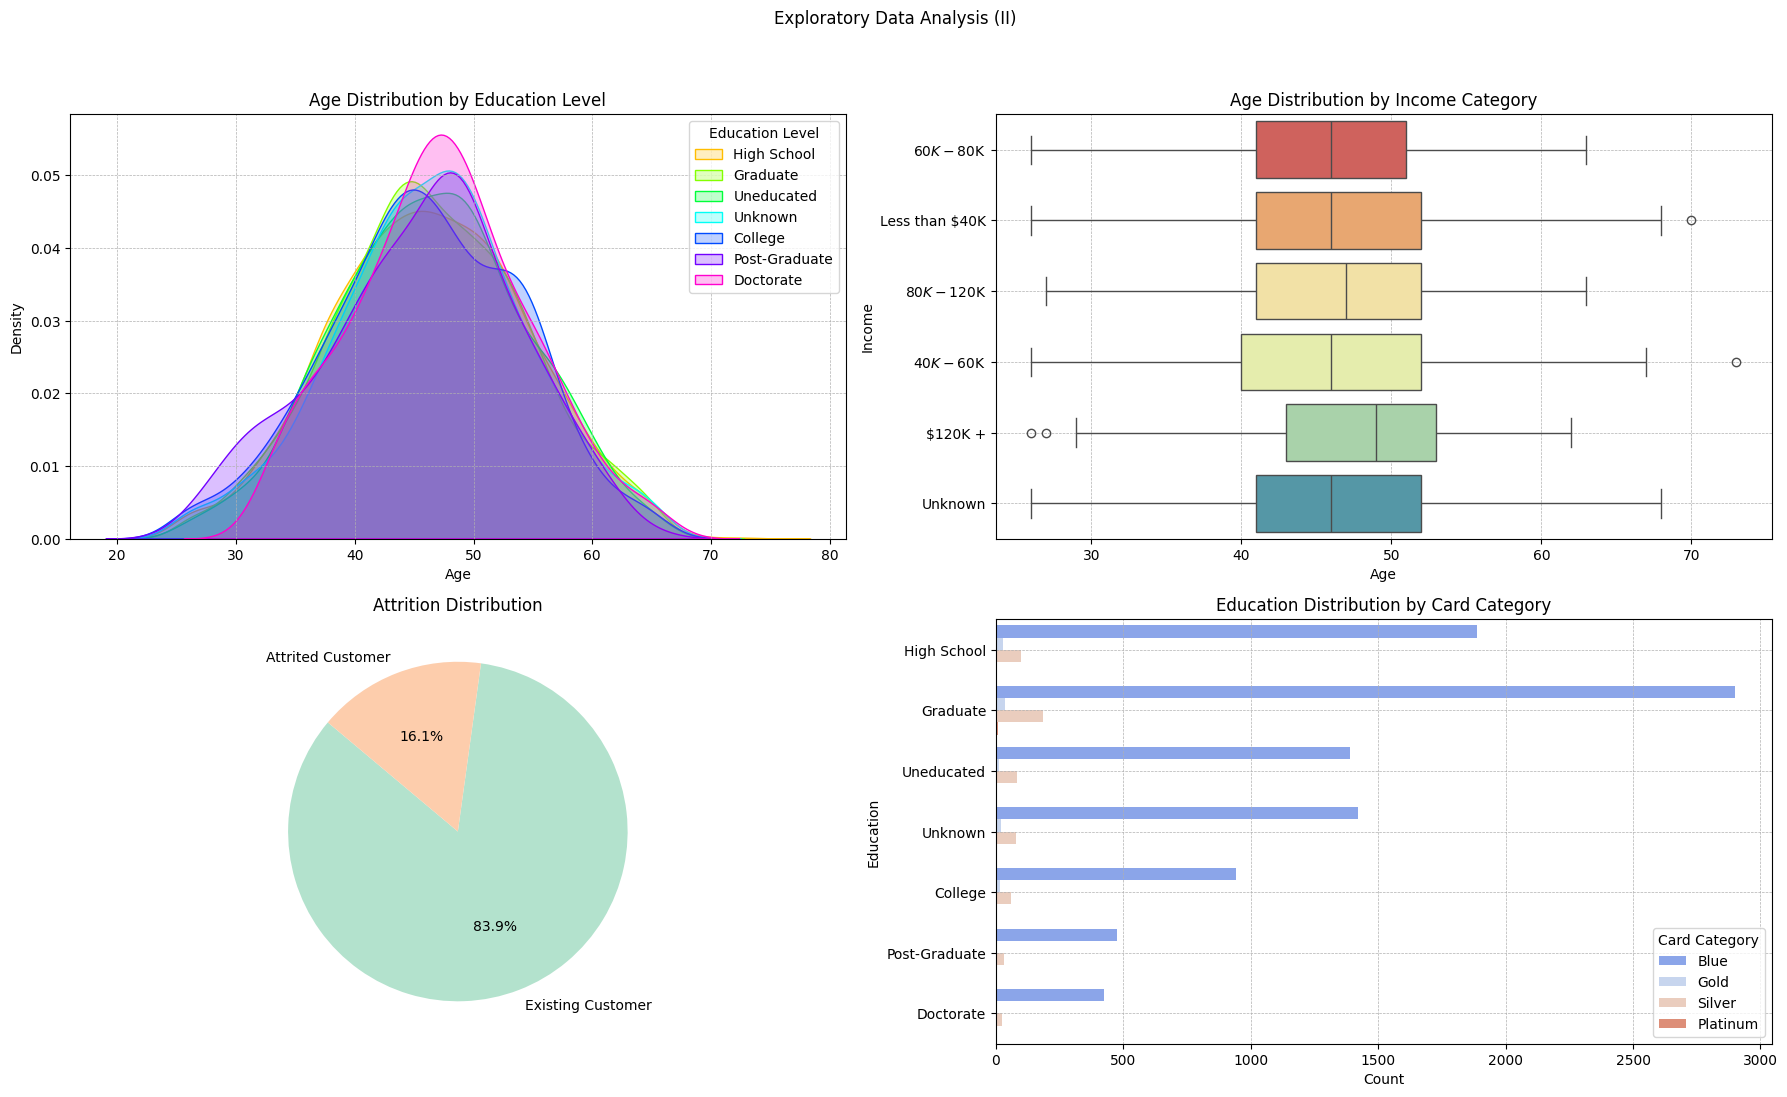

In [6]:
warnings.filterwarnings("ignore")

# Setting up the subplot area
fig, axes = plt.subplots(2, 2, figsize = (18, 11.5))  # Adjust the size as needed
fig.suptitle('Exploratory Data Analysis (II)')

# Age Distribution by Education Level
education_levels = df['Education_Level'].unique()
palette = sns.color_palette("hsv", len(education_levels))
for i, level in enumerate(education_levels):
    sns.kdeplot(df[df['Education_Level'] == level]['Customer_Age'], ax = axes[0, 0], shade = True, label = level, color = palette[i])
axes[0, 0].set_title('Age Distribution by Education Level')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Density')
axes[0, 0].legend(title = 'Education Level')
axes[0, 0].grid(True, which = "both", ls = "--", linewidth = 0.5)

# Age and Income Distribution
sns.boxplot(x = 'Customer_Age', y = 'Income_Category', data = df, ax = axes[0, 1], palette = 'Spectral')
axes[0, 1].set_title('Age Distribution by Income Category')
axes[0, 1].set_xlabel('Age')
axes[0, 1].set_ylabel('Income')
axes[0, 1].grid(True)
axes[0, 1].grid(True, which = "both", ls = "--", linewidth = 0.5)

# Attrition Flag Distribution
attrition_counts = df['Attrition_Flag'].value_counts()
axes[1, 0].pie(attrition_counts, labels = attrition_counts.index, autopct = '%1.1f%%', startangle = 140, colors = sns.color_palette("Pastel2", len(attrition_counts)))
axes[1, 0].set_title('Attrition Distribution')

# Education and Card Category Loan Distribution
sns.countplot(y = 'Education_Level', hue = 'Card_Category', data = df, ax = axes[1, 1], palette = 'coolwarm')
axes[1, 1].set_title('Education Distribution by Card Category')
axes[1, 1].set_xlabel('Count')
axes[1, 1].set_ylabel('Education')
axes[1, 1].legend(title = 'Card Category')
axes[1, 1].grid(True, which = "both", ls = "--", linewidth = 0.5)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust for the main title and subplots
plt.show()

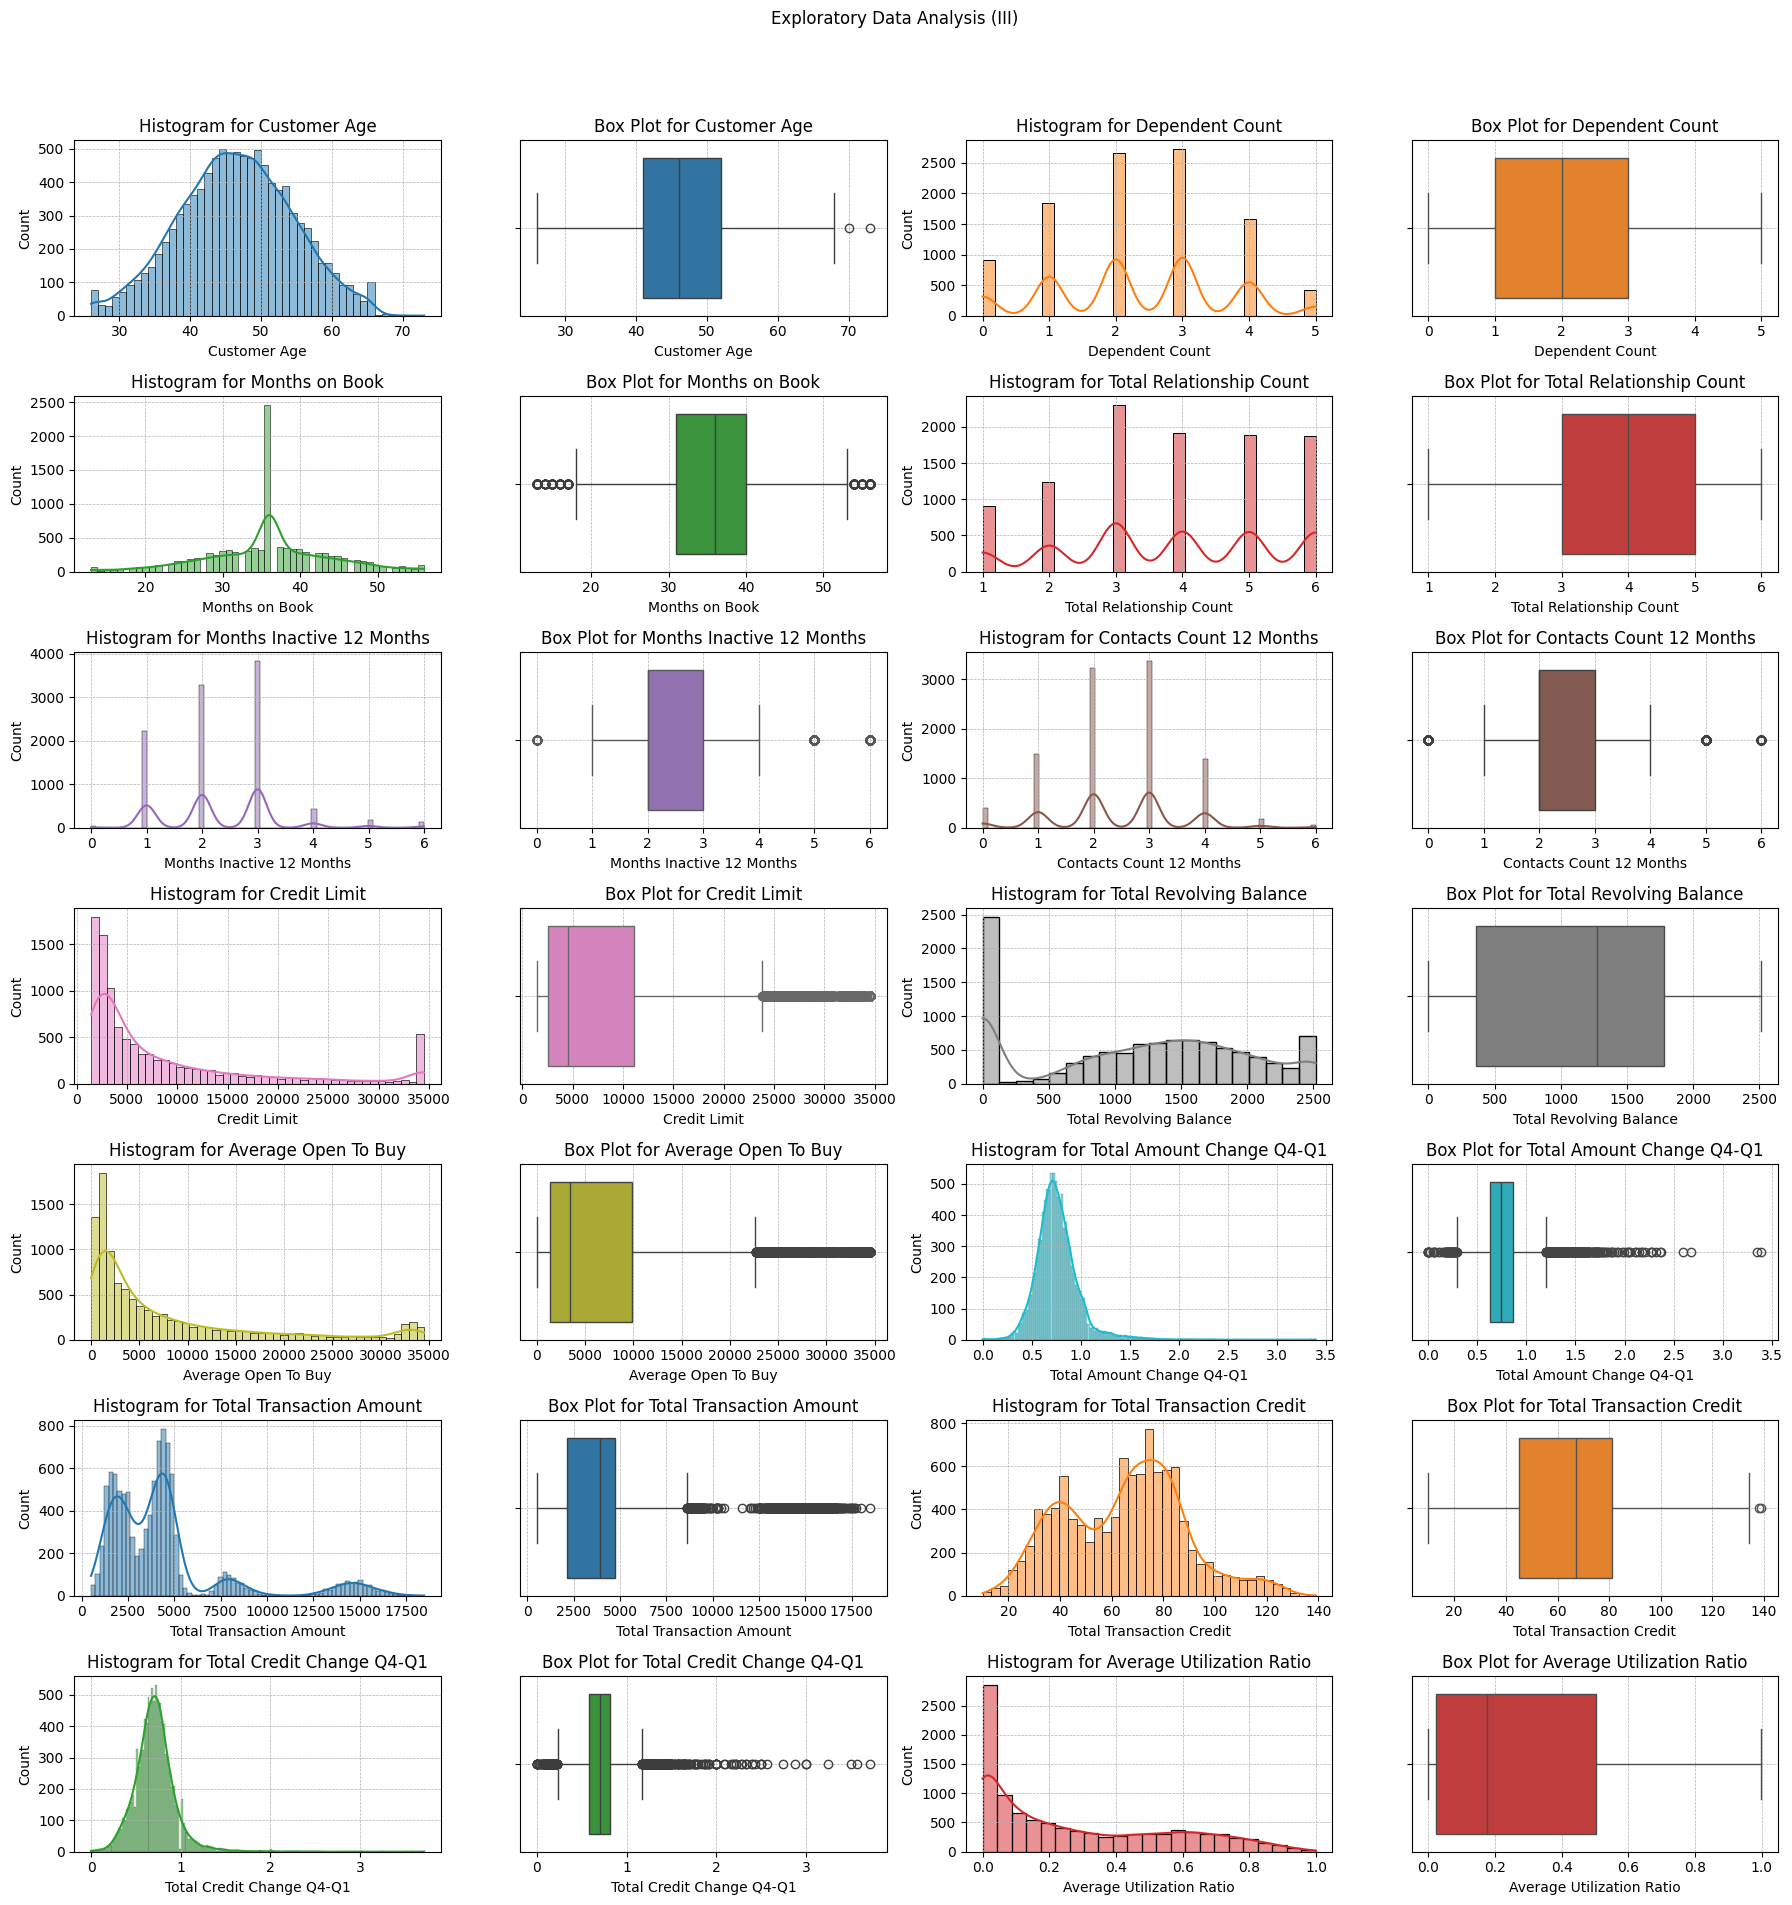

In [7]:
# List of columns to plot
columns_to_plot = {
    "Customer_Age": "Customer Age", 
    "Dependent_count": "Dependent Count", 
    "Months_on_book": "Months on Book", 
    "Total_Relationship_Count": "Total Relationship Count",
    "Months_Inactive_12_mon": "Months Inactive 12 Months", 
    "Contacts_Count_12_mon": "Contacts Count 12 Months", 
    "Credit_Limit": "Credit Limit",
    "Total_Revolving_Bal": "Total Revolving Balance", 
    "Avg_Open_To_Buy": "Average Open To Buy", 
    "Total_Amt_Chng_Q4_Q1": "Total Amount Change Q4-Q1",
    "Total_Trans_Amt": "Total Transaction Amount", 
    "Total_Trans_Ct": "Total Transaction Credit", 
    "Total_Ct_Chng_Q4_Q1": "Total Credit Change Q4-Q1",
    "Avg_Utilization_Ratio": "Average Utilization Ratio"
}

# Set the color palette
palette = sns.color_palette("tab10")

rows_needed = 7

fig, axes = plt.subplots(nrows=rows_needed, ncols=4, figsize=(18, 20))
fig.suptitle('Exploratory Data Analysis (III)')

# Loop through the list and create a histogram and boxplot for each numerical column
for i, (column_key, column_name) in enumerate(columns_to_plot.items()):
    # Histogram
    sns.histplot(df[column_key], ax=axes[i // 2, (i % 2) * 2], kde=True, color=palette[i % len(palette)])
    axes[i // 2, (i % 2) * 2].set_title(f'Histogram for {column_name}')
    axes[i // 2, (i % 2) * 2].set_xlabel(column_name)
    axes[i // 2, (i % 2) * 2].grid(True, which="both", ls="--", linewidth=0.5)
    
    # Box plot
    sns.boxplot(x=df[column_key], ax=axes[i // 2, (i % 2) * 2 + 1], color=palette[i % len(palette)])
    axes[i // 2, (i % 2) * 2 + 1].set_title(f'Box Plot for {column_name}')
    axes[i // 2, (i % 2) * 2 + 1].set_xlabel(column_name)
    axes[i // 2, (i % 2) * 2 + 1].grid(True, which="both", ls="--", linewidth=0.5)


# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## <span style="font-family: Latin Modern Roman; font-size: 20px; font-style: italic;"> Insights Gained from Initial Exploration </span>
<div style="text-align: justify;">

- El número del cliente es irrelevante para el análisis, por lo que se elimina dicha columna.
</div>

In [8]:
df = df.drop(columns=['CLIENTNUM'])
df = df.drop(columns=['Customer_Age_Group'])

- El salario de los clientes en uno de los factores críticos para los servicios provistos por la compañía de tarjetas de crédito. Se excluyen aquellos clientes cuyos ingresos son desconocidos, lo que servirá para segmentar a los clientes de manera más efectiva.

In [9]:
df['Income_Category'].value_counts()

Income_Category
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: count, dtype: int64

In [10]:
df = df.drop(df[df['Income_Category'] == 'Unknown'].index)

- Se agrupan los clientes divorciados con los clientes solteros dado que el aspecto importante para el análisis es saber si el cliente tiene pareja o no.

In [11]:
df['Marital_Status'].value_counts()

Marital_Status
Married     4194
Single      3499
Unknown      667
Divorced     655
Name: count, dtype: int64

In [12]:
df['Marital_Status'] = df['Marital_Status'].replace(['Divorced'], 'Single')

- Como el porcentaje de los clientes que tienen una tarjeta Oro o Platino es tan pequeño, se agrupan estas categorías con las tarjetas Plata, creando una nueva categoría, principalmente para distinguir estos clientes de aquellos que poseen la tarjeta más básica.

In [13]:
df['Card_Category'].value_counts()

Card_Category
Blue        8391
Silver       502
Gold         107
Platinum      15
Name: count, dtype: int64

In [14]:
df['Card_Category'] = df['Card_Category'].replace(['Silver', 'Gold', 'Platinum'], 'Silver+')

- Se remueven las columnas que presentan outliers significativos que están muy alejados de los distribución de los datos

In [15]:
def remove_outliers(df, columns):

    # Create a copy of the dataframe
    clean_df = df.copy()
    
    for column in columns:
        Q1 = clean_df[column].quantile(0.25)
        Q3 = clean_df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        clean_df = clean_df[(clean_df[column] >= lower_bound) & (clean_df[column] <= upper_bound)]
        
    return clean_df

columns_to_check = ["Total_Amt_Chng_Q4_Q1", "Total_Trans_Amt", "Total_Ct_Chng_Q4_Q1"]

df_no_outliers = remove_outliers(df, columns_to_check)


In [16]:
df = df_no_outliers

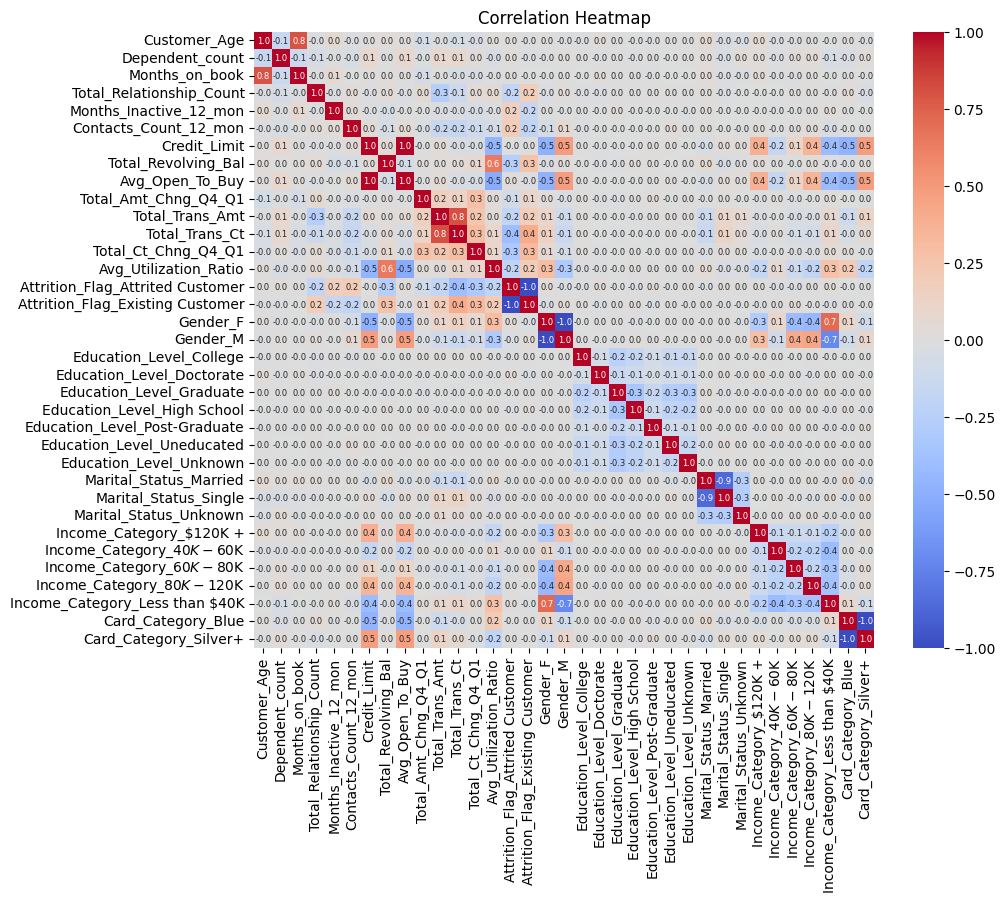

In [17]:
df_dummies = pd.get_dummies(df)

# Plot Correlation Heatmap
plt.figure(figsize = (10, 8))
sns.heatmap(df_dummies.corr(), annot=True, cmap = "coolwarm", fmt = ".1f", annot_kws = {"size": 6})
plt.title("Correlation Heatmap", fontsize=12)
plt.show()

- Se elimina la columna `Avg_Open_To_Buy` puesto que tiene correlación perfecta con `Credit_Limit` y sería redundante mantener ambas variables

In [18]:
df = df.drop(columns=['Avg_Open_To_Buy'])

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7636 entries, 10 to 10125
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            7636 non-null   object 
 1   Customer_Age              7636 non-null   int64  
 2   Gender                    7636 non-null   object 
 3   Dependent_count           7636 non-null   int64  
 4   Education_Level           7636 non-null   object 
 5   Marital_Status            7636 non-null   object 
 6   Income_Category           7636 non-null   object 
 7   Card_Category             7636 non-null   object 
 8   Months_on_book            7636 non-null   int64  
 9   Total_Relationship_Count  7636 non-null   int64  
 10  Months_Inactive_12_mon    7636 non-null   int64  
 11  Contacts_Count_12_mon     7636 non-null   int64  
 12  Credit_Limit              7636 non-null   float64
 13  Total_Revolving_Bal       7636 non-null   int64  
 14  Total_Amt_C

---

## <span style="font-family: Latin Modern Roman; font-size: 25px;"> 3. Data Preprocessing </span>

In [20]:
one_hot_cols = ["Gender", "Education_Level", "Marital_Status", "Income_Category", 
                "Card_Category", "Dependent_count", "Total_Relationship_Count", 
                "Months_Inactive_12_mon", "Contacts_Count_12_mon", "Attrition_Flag"]
standard_cols = ["Customer_Age", "Total_Amt_Chng_Q4_Q1", "Total_Ct_Chng_Q4_Q1", "Months_on_book"]
minmax_cols = ["Total_Trans_Amt", "Total_Trans_Ct", "Total_Revolving_Bal"]
power_cols = ["Total_Revolving_Bal", "Credit_Limit", "Avg_Utilization_Ratio"]

In [21]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler, PowerTransformer
from sklearn.compose import ColumnTransformer
import numpy as np

preprocessing = ColumnTransformer(
    [
        ("one-hot", OneHotEncoder(), one_hot_cols),
        ("standard", StandardScaler(), standard_cols),
        ("minmax", MinMaxScaler(), minmax_cols),
        ("power", PowerTransformer(), power_cols),
    ]
)

df_scaled = preprocessing.fit_transform(df)
one_hot_cols_encoded = preprocessing.named_transformers_['one-hot'].get_feature_names_out(one_hot_cols)
standard_cols_encoded = preprocessing.named_transformers_['standard'].get_feature_names_out(standard_cols)
minmax_cols_encoded = preprocessing.named_transformers_['minmax'].get_feature_names_out(minmax_cols)
power_cols_encoded = preprocessing.named_transformers_['power'].get_feature_names_out(power_cols)
columns_labels = np.concatenate([one_hot_cols_encoded, standard_cols_encoded, minmax_cols_encoded, power_cols_encoded])

df_scaled = pd.DataFrame(df_scaled, columns = columns_labels)

In [22]:
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7636 entries, 0 to 7635
Data columns (total 57 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Gender_F                          7636 non-null   float64
 1   Gender_M                          7636 non-null   float64
 2   Education_Level_College           7636 non-null   float64
 3   Education_Level_Doctorate         7636 non-null   float64
 4   Education_Level_Graduate          7636 non-null   float64
 5   Education_Level_High School       7636 non-null   float64
 6   Education_Level_Post-Graduate     7636 non-null   float64
 7   Education_Level_Uneducated        7636 non-null   float64
 8   Education_Level_Unknown           7636 non-null   float64
 9   Marital_Status_Married            7636 non-null   float64
 10  Marital_Status_Single             7636 non-null   float64
 11  Marital_Status_Unknown            7636 non-null   float64
 12  Income

In [23]:
X = df_scaled.drop(['Attrition_Flag_Attrited Customer', 'Attrition_Flag_Existing Customer'], axis = 1)
X = X.drop(['Gender_M'], axis = 1)
y = df_scaled['Attrition_Flag_Attrited Customer']

In [24]:
from sklearn.model_selection import train_test_split

# Dividing the dataset in training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 42, stratify = y)

---

## <span style="font-family: Latin Modern Roman; font-size: 25px;"> 4. Association Rules </span>

In [25]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

nominal_categories = {
    'Attrition_Flag': 'Attrition',
    'Gender': 'Gender',
    'Education_Level': 'Education Level',
    'Marital_Status': 'Marital Status',
    'Income_Category': 'Income Level',
    'Card_Category': 'Card Category'
}

one_hot_feature_names = []

for key in nominal_categories.keys():
    one_hot_feature_names.extend([col for col in df_scaled.columns if col.startswith(key)])

# Select only nominal categories form Apriori Algorithm
df_rules = df_scaled[one_hot_feature_names].astype(bool)

# Apply the Apriori Algorithm to find frequent itemsets. Sort them by support
frequent_itemsets = apriori(df_rules, min_support = 0.35, use_colnames = True, verbose = 1).sort_values(by = 'support', ascending = False)
frequent_itemsets

Processing 45 combinations | Sampling itemset size 3


support                                           itemsets
6   0.944605                               (Card_Category_Blue)
0   0.830801                 (Attrition_Flag_Existing Customer)
11  0.785359  (Card_Category_Blue, Attrition_Flag_Existing C...
2   0.502619                                         (Gender_M)
1   0.497381                                         (Gender_F)
13  0.480094                     (Gender_F, Card_Category_Blue)
4   0.472499                            (Marital_Status_Single)
14  0.464510                     (Gender_M, Card_Category_Blue)
3   0.452200                           (Marital_Status_Married)
16  0.441723        (Card_Category_Blue, Marital_Status_Single)
15  0.432687       (Marital_Status_Married, Card_Category_Blue)
8   0.423389       (Gender_M, Attrition_Flag_Existing Customer)
5   0.408853                   (Income_Category_Less than $40K)
7   0.407412       (Gender_F, Attrition_Flag_Existing Customer)
17  0.395102  (Income_Category_Less than $40K, Card_Category...
18  0.393007  (Gender_F, Card_Category_Blue, Attrition_Flag_...
19  0.392352  (Gender_M, Card_Category_Blue, Attrition_Flag_...
10  0.390519  (Marital_Status_Single, Attrition_Flag_Existin...
12  0.379780         (Income_Category_Less than $40K, Gender_F)
9   0.378339  (Marital_Status_Married, Attrition_Flag_Existi...
22  0.367208  (Income_Category_Less than $40K, Gender_F, Car...
21  0.366029  (Marital_Status_Single, Card_Category_Blue, At...
20  0.361708  (Marital_Status_Married, Card_Category_Blue, A...

In [26]:
# Generate and sort Association Rules
rules_confidence = association_rules(frequent_itemsets, metric = 'confidence', min_threshold = 0.9).sort_values(by = 'confidence', ascending = False)
rules_confidence


antecedents           consequents  \
9          (Income_Category_Less than $40K, Gender_F)  (Card_Category_Blue)   
5                    (Income_Category_Less than $40K)  (Card_Category_Blue)   
1                                          (Gender_F)  (Card_Category_Blue)   
6        (Gender_F, Attrition_Flag_Existing Customer)  (Card_Category_Blue)   
4                            (Marital_Status_Married)  (Card_Category_Blue)   
12  (Marital_Status_Married, Attrition_Flag_Existi...  (Card_Category_Blue)   
0                  (Attrition_Flag_Existing Customer)  (Card_Category_Blue)   
11  (Marital_Status_Single, Attrition_Flag_Existin...  (Card_Category_Blue)   
3                             (Marital_Status_Single)  (Card_Category_Blue)   
10  (Income_Category_Less than $40K, Card_Category...            (Gender_F)   
8                    (Income_Category_Less than $40K)            (Gender_F)   
7        (Gender_M, Attrition_Flag_Existing Customer)  (Card_Category_Blue)   
2                                          (Gender_M)  (Card_Category_Blue)   

    antecedent support  consequent support   support  confidence      lift  \
9             0.379780            0.944605  0.367208    0.966897  1.023599   
5             0.408853            0.944605  0.395102    0.966368  1.023039   
1             0.497381            0.944605  0.480094    0.965245  1.021851   
6             0.407412            0.944605  0.393007    0.964642  1.021212   
4             0.452200            0.944605  0.432687    0.956849  1.012963   
12            0.378339            0.944605  0.361708    0.956040  1.012106   
0             0.830801            0.944605  0.785359    0.945303  1.000739   
11            0.390519            0.944605  0.366029    0.937290  0.992257   
3             0.472499            0.944605  0.441723    0.934867  0.989691   
10            0.395102            0.497381  0.367208    0.929400  1.868588   
8             0.408853            0.497381  0.379780    0.928892  1.867566   
7             0.423389            0.944605  0.392352    0.926693  0.981039   
2             0.502619            0.944605  0.464510    0.924179  0.978377   

    leverage  conviction  zhangs_metric  
9   0.008466    1.673406       0.037173  
5   0.008898    1.647093       0.038096  
1   0.010266    1.593879       0.042544  
6   0.008163    1.566685       0.035052  
4   0.005537    1.283763       0.023360  
12  0.004327    1.260138       0.019241  
0   0.000580    1.012764       0.004365  
11 -0.002856    0.883366      -0.012642  
3  -0.004601    0.850498      -0.019364  
10  0.170692    7.119258       0.768455  
8   0.176424    7.068365       0.785834  
7  -0.007583    0.755669      -0.032433  
2  -0.010266    0.730611      -0.042544

In [27]:
rules_lift = association_rules(frequent_itemsets, metric = "lift", min_threshold = 1.3).sort_values(by = 'lift', ascending = False)
rules_lift

antecedents  \
3                     (Gender_F, Card_Category_Blue)   
4                   (Income_Category_Less than $40K)   
2  (Income_Category_Less than $40K, Card_Category...   
5                                         (Gender_F)   
0                   (Income_Category_Less than $40K)   
1                                         (Gender_F)   

                                         consequents  antecedent support  \
3                   (Income_Category_Less than $40K)            0.480094   
4                     (Gender_F, Card_Category_Blue)            0.408853   
2                                         (Gender_F)            0.395102   
5  (Income_Category_Less than $40K, Card_Category...            0.497381   
0                                         (Gender_F)            0.408853   
1                   (Income_Category_Less than $40K)            0.497381   

   consequent support   support  confidence      lift  leverage  conviction  \
3            0.408853  0.367208    0.764866  1.870762  0.170920    2.514090   
4            0.480094  0.367208    0.898142  1.870762  0.170920    5.104232   
2            0.497381  0.367208    0.929400  1.868588  0.170692    7.119258   
5            0.395102  0.367208    0.738283  1.868588  0.170692    2.311270   
0            0.497381  0.379780    0.928892  1.867566  0.176424    7.068365   
1            0.408853  0.379780    0.763560  1.867566  0.176424    2.500197   

   zhangs_metric  
3       0.895275  
4       0.787382  
2       0.768455  
5       0.924829  
0       0.785834  
1       0.924246

---

## <span style="font-family: Latin Modern Roman; font-size: 25px;"> 5. Decision Tree - CART </span>

In [28]:
from sklearn.tree import DecisionTreeClassifier

# Creating the model with decision tree
cart_model = DecisionTreeClassifier(
            max_depth = 10,
            criterion = 'gini',
            random_state = 42
          )

# Fit the model
cart_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=42)

CART Decision Tree Depth: 10
Number of Leaves or Terminal Nodes: 171


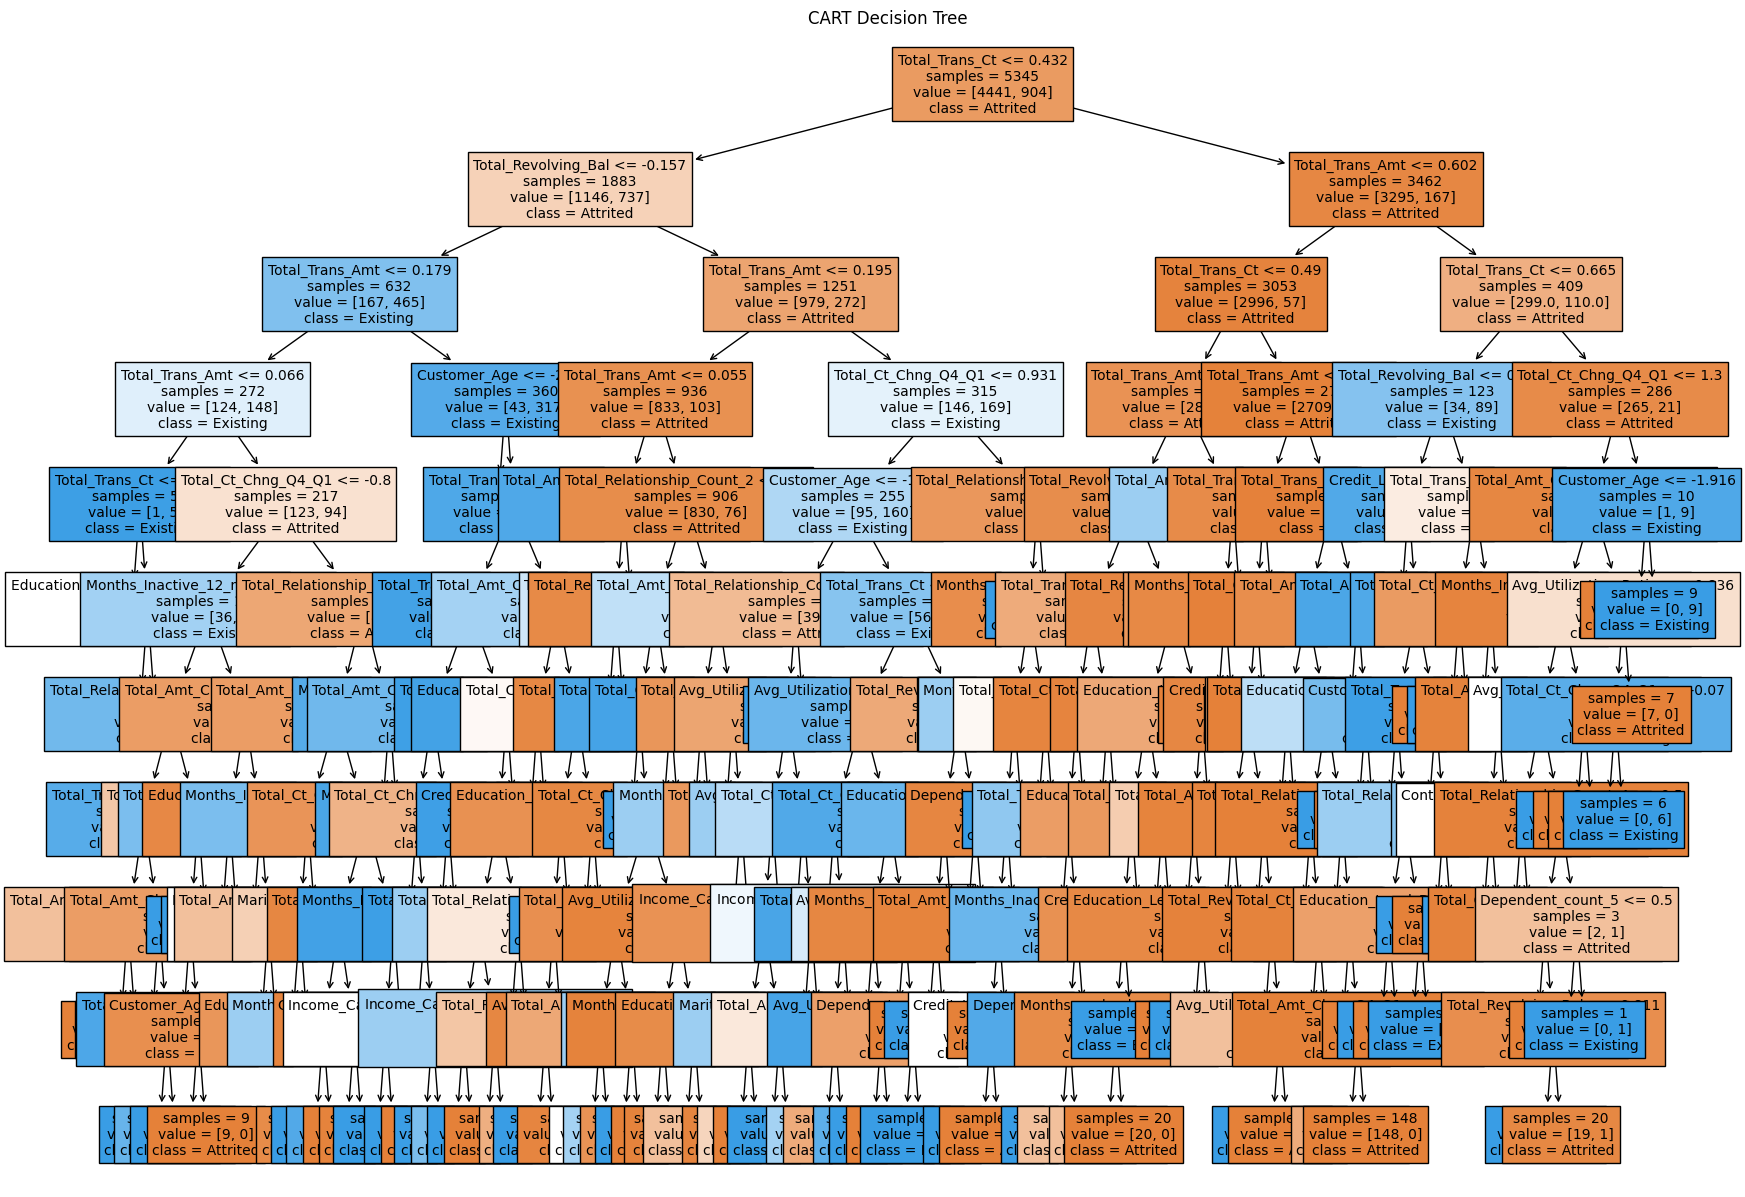

In [29]:
from sklearn.tree import plot_tree

print(f"CART Decision Tree Depth: {cart_model.get_depth()}")
print(f"Number of Leaves or Terminal Nodes: {cart_model.get_n_leaves()}")

# Set the size of the plot
fig, ax = plt.subplots(figsize=(20, 15))

# Plot the decision tree
plot = plot_tree(
    decision_tree = cart_model,  # Plotting the first tree in the forest
    feature_names = X_train.columns.tolist(),
    class_names = ['Attrited', 'Existing'],
    filled = True,
    impurity = False,
    fontsize = 10,
    ax = ax
)

# Add title and other customizations to match the style of your OOB error graph
ax.set_title("CART Decision Tree", fontsize = 12)

# Show the plot
plt.show()

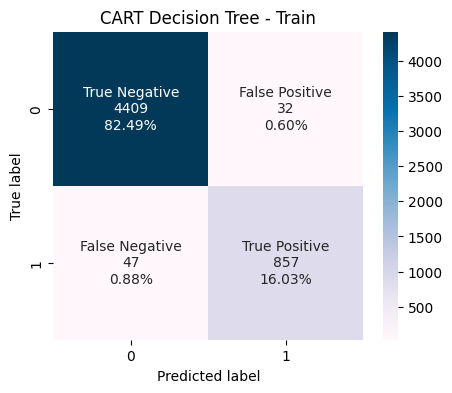

In [30]:
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_train, cart_model.predict(X_train), labels = cart_model.classes_)

# Define the group names and formats
group_names = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)

# Create the heatmap with custom labels
fig, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(cm, annot=labels, fmt='', cmap='PuBu', ax=ax)
ax.set_title('CART Decision Tree - Train', fontsize = 12)
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')
plt.show()


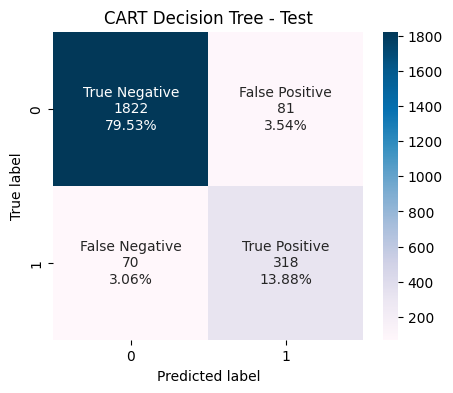

In [31]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, cart_model.predict(X_test), labels = cart_model.classes_)

# Define the group names and formats
group_names = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)

# Create the heatmap with custom labels
fig, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(cm, annot=labels, fmt='', cmap='PuBu', ax=ax)
ax.set_title('CART Decision Tree - Test', fontsize = 12)
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')
plt.show()


## <span style="font-family: Latin Modern Roman; font-size: 23px;"> 5.1. Pruning Analysis</span>

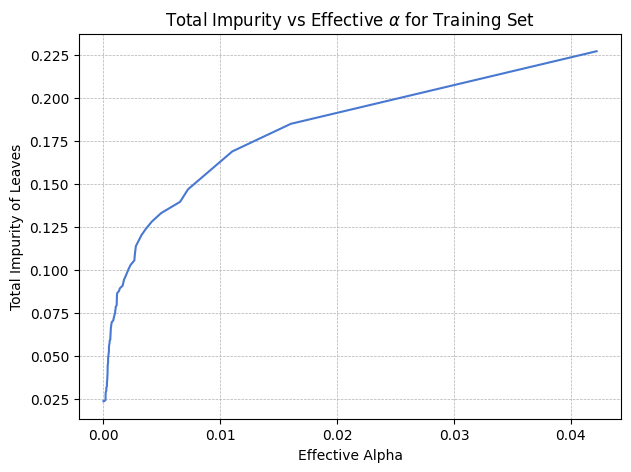

In [32]:
# Analyzing Pruning

path = cart_model.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

sns.set_palette("muted")
fig, ax = plt.subplots(figsize=(7, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], "o-")
ax.set_xlabel("Effective Alpha")
ax.set_ylabel("Total Impurity of Leaves")
ax.set_title(r'Total Impurity vs Effective $\alpha$ for Training Set', fontsize = 12)
plt.grid(True, which = "both", ls = "--", linewidth = 0.5)

In [33]:
# Different alpha options are tried
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of Nodes in the Last Tree is: {} with ccp_alpha = {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of Nodes in the Last Tree is: 3 with ccp_alpha = 0.05374053361772965


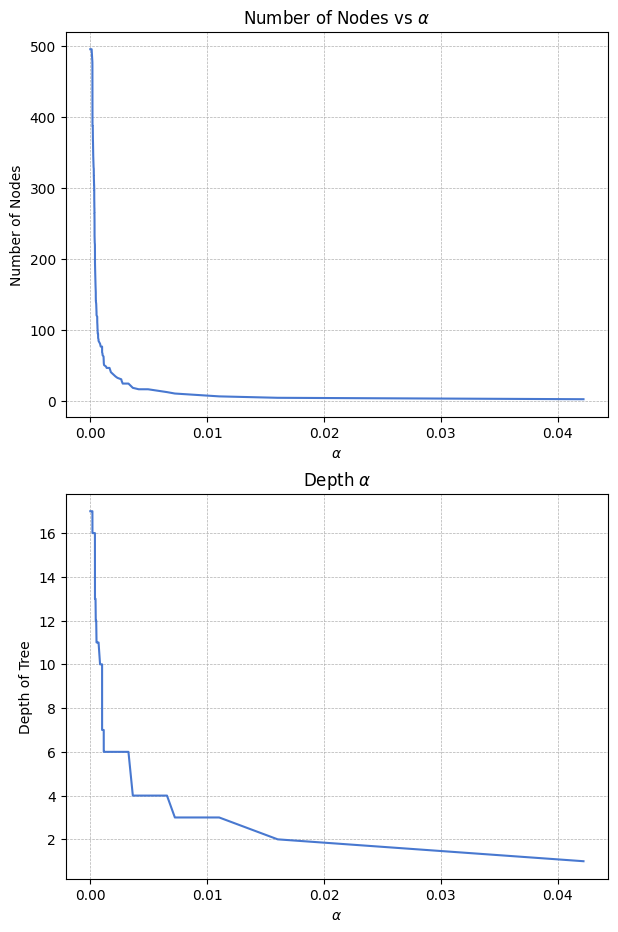

In [34]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(7, 11))
ax[0].plot(ccp_alphas, node_counts, "o-")
ax[0].set_xlabel(r'$\alpha$')
ax[0].set_ylabel("Number of Nodes")
ax[0].set_title(r'Number of Nodes vs $\alpha$', fontsize = 12)
ax[0].grid(True, which = "both", ls = "--", linewidth = 0.5)
ax[1].plot(ccp_alphas, depth, "o-")
ax[1].set_xlabel(r'$\alpha$')
ax[1].set_ylabel("Depth of Tree")
ax[1].set_title(r'Depth $\alpha$', fontsize = 12)
ax[1].grid(True, which = "both", ls = "--", linewidth = 0.5)


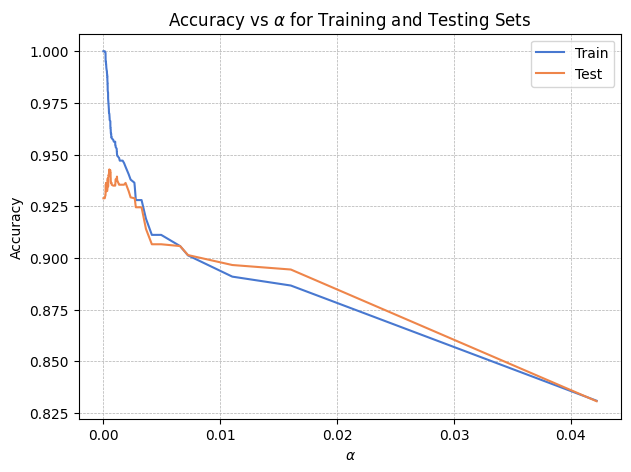

In [35]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots(figsize=(7, 5))
ax.set_xlabel(r'$\alpha$')
ax.set_ylabel("Accuracy")
ax.set_title(r'Accuracy vs $\alpha$ for Training and Testing Sets', fontsize = 12)
ax.plot(ccp_alphas, train_scores, label = "Train")
ax.plot(ccp_alphas, test_scores, "o-", label = "Test")
ax.legend()
plt.grid(True, which = "both", ls = "--", linewidth = 0.5)
plt.show()

In [36]:
ccp_alphas_df = pd.DataFrame({'ccp_alphas': ccp_alphas, 'train_scores': train_scores, 'test_scores': test_scores})
ccp_alphas_df = ccp_alphas_df.sort_values(['test_scores'], ascending = False)
ccp_alphas_df.head(10)

ccp_alphas  train_scores  test_scores
71    0.000505      0.969691     0.942820
72    0.000532      0.967446     0.942383
76    0.000591      0.965762     0.942383
74    0.000535      0.966698     0.942383
75    0.000590      0.966137     0.942383
73    0.000532      0.967072     0.941947
77    0.000595      0.963517     0.941947
70    0.000477      0.970253     0.941074
79    0.000613      0.962956     0.941074
78    0.000608      0.962956     0.941074

In [37]:
# Obtaining the best alpha from the previous list
best_alpha= ccp_alphas_df.iloc[0][0]
best_alpha


0.0005051449953227317

In [38]:
# Fit the pruned tree with best alpha
pruned_tree_I = DecisionTreeClassifier(ccp_alpha = best_alpha, random_state = 42)
pruned_tree_I.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0005051449953227317, random_state=42)

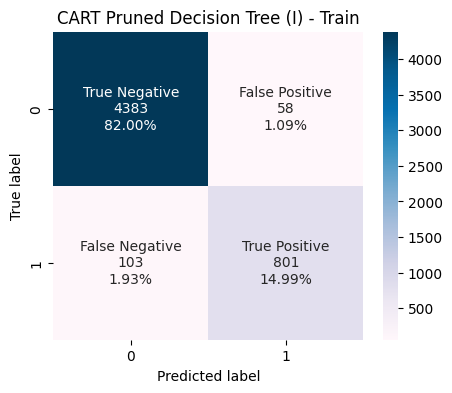

In [39]:
# Calculate the confusion matrix
cm = confusion_matrix(y_train, pruned_tree_I.predict(X_train), labels = pruned_tree_I.classes_)

# Define the group names and formats
group_names = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)

# Create the heatmap with custom labels
fig, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(cm, annot=labels, fmt='', cmap='PuBu', ax=ax)
ax.set_title('CART Pruned Decision Tree (I) - Train', fontsize = 12)
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')
plt.show()


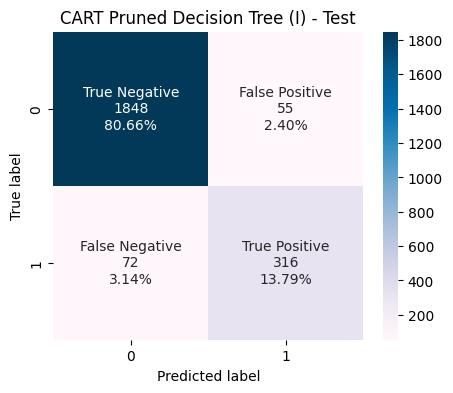

In [40]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, pruned_tree_I.predict(X_test), labels = pruned_tree_I.classes_)

# Define the group names and formats
group_names = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)

# Create the heatmap with custom labels
fig, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(cm, annot=labels, fmt='', cmap='PuBu', ax=ax)
ax.set_title('CART Pruned Decision Tree (I) - Test', fontsize = 12)
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')
plt.show()


CART Pruned Decision Tree (I) Depth: 12
Number of Leaves or Terminal Nodes: 69


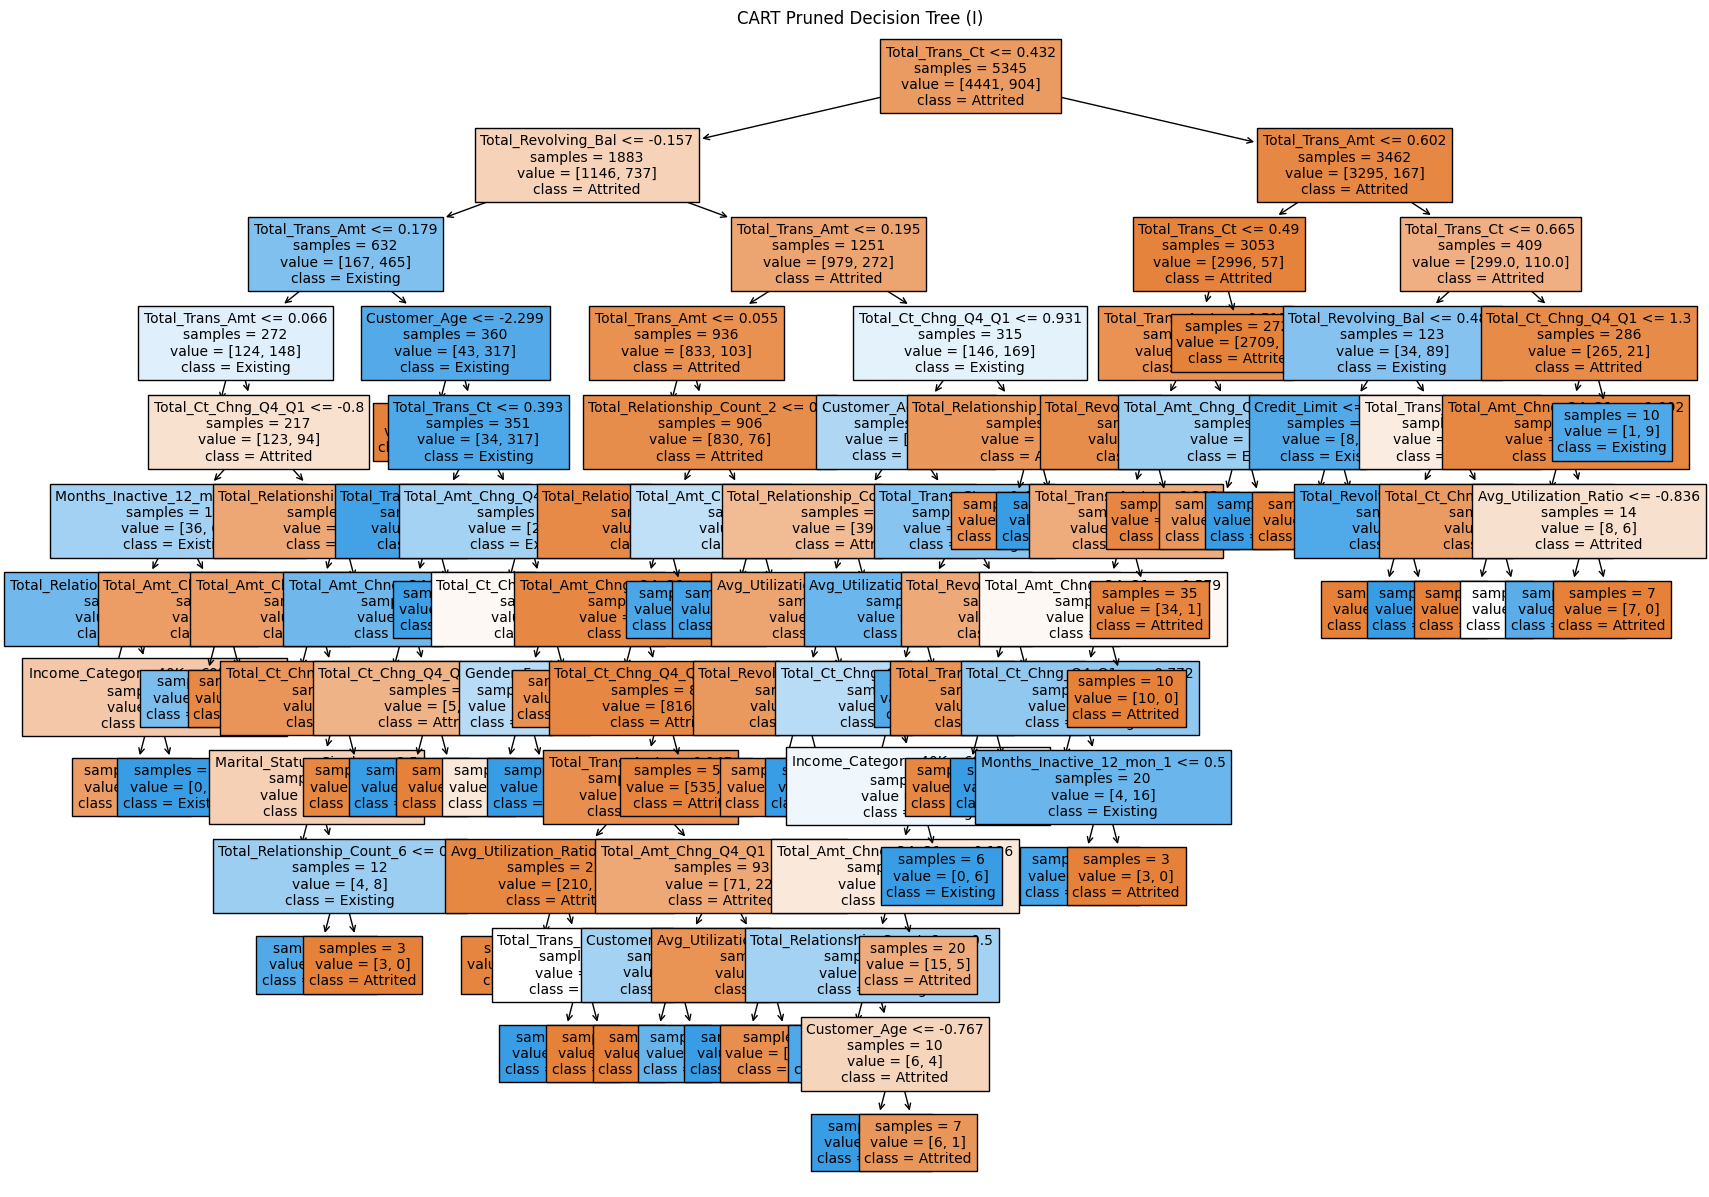

In [41]:
print(f"CART Pruned Decision Tree (I) Depth: {pruned_tree_I.get_depth()}")
print(f"Number of Leaves or Terminal Nodes: {pruned_tree_I.get_n_leaves()}")

# Set the size of the plot
fig, ax = plt.subplots(figsize=(20, 15))

# Plot the decision tree
plot = plot_tree(
    decision_tree = pruned_tree_I,  # Plotting the first tree in the forest
    feature_names = X_train.columns.tolist(),
    class_names = ['Attrited', 'Existing'],
    filled = True,
    impurity = False,
    fontsize = 10,
    ax = ax
)

# Add title and other customizations to match the style of your OOB error graph
ax.set_title("CART Pruned Decision Tree (I)", fontsize = 12)

# Show the plot
plt.show()

In [42]:
from sklearn.model_selection import GridSearchCV

#  Alternative method using GridSearchCV to fine tune method parameters
param_grid = {
    'max_depth':[5, 8, 10, 15],
    'min_samples_split':[10, 30, 50, 60, 70],
    'min_impurity_decrease': [0.0001, 0.0005, 0.001, 0.005, 0.01]
}

gridSearch = GridSearchCV(DecisionTreeClassifier(random_state = 42), param_grid, cv = 10, n_jobs = 1)
gridSearch.fit(X_train, y_train)

print('Initial Score: ', gridSearch.best_score_)
print('Initial Parameters: ', gridSearch.best_params_)


Initial Score:  0.9354531135146488
Initial Parameters:  {'max_depth': 8, 'min_impurity_decrease': 0.0005, 'min_samples_split': 10}


In [43]:
# Adapt grid based on result from initial grid search
param_grid = {
    'max_depth': [6, 7, 8, 9, 10],
    'min_samples_split': [8, 10, 12, 15],
    'min_impurity_decrease': [0.0001, 0.0003, 0.0005, 0.0007, 0.001],
}
gridSearch = GridSearchCV(DecisionTreeClassifier(random_state = 42), param_grid, cv = 10, n_jobs = -1)
gridSearch.fit(X_train, y_train)

print('Improved Score: ', gridSearch.best_score_)
print('Improved Parameters: ', gridSearch.best_params_)
bestClassTree = gridSearch.best_estimator_

Improved Score:  0.9362011270958032
Improved Parameters:  {'max_depth': 8, 'min_impurity_decrease': 0.0005, 'min_samples_split': 12}


In [44]:
# Fit the pruned tree with improved parameters
pruned_tree_II = DecisionTreeClassifier(random_state = 42, max_depth = 8, min_impurity_decrease = 0.0005, min_samples_split = 12)
pruned_tree_II.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8, min_impurity_decrease=0.0005,
                       min_samples_split=12, random_state=42)

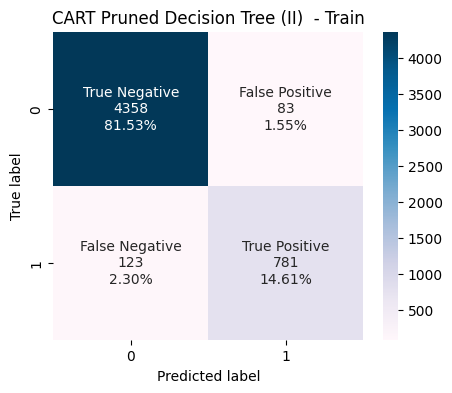

In [45]:
# Calculate the confusion matrix
cm = confusion_matrix(y_train, pruned_tree_II.predict(X_train), labels = pruned_tree_II.classes_)

# Define the group names and formats
group_names = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)

# Create the heatmap with custom labels
fig, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(cm, annot=labels, fmt='', cmap='PuBu', ax=ax)
ax.set_title('CART Pruned Decision Tree (II)  - Train', fontsize = 12)
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')
plt.show()

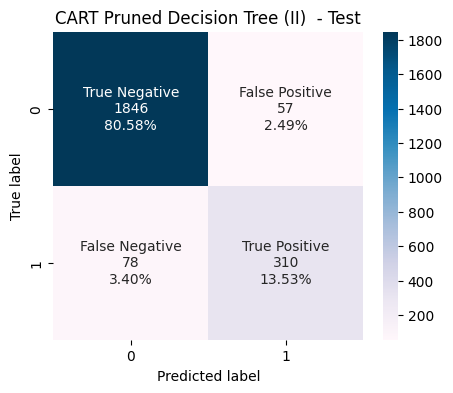

In [46]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, pruned_tree_II.predict(X_test), labels = pruned_tree_II.classes_)

# Define the group names and formats
group_names = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)

# Create the heatmap with custom labels
fig, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(cm, annot=labels, fmt='', cmap='PuBu', ax=ax)
ax.set_title('CART Pruned Decision Tree (II)  - Test', fontsize = 12)
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')
plt.show()

CART Pruned Decision Tree (II) Depth: 8
Number of Leaves or Terminal Nodes: 53


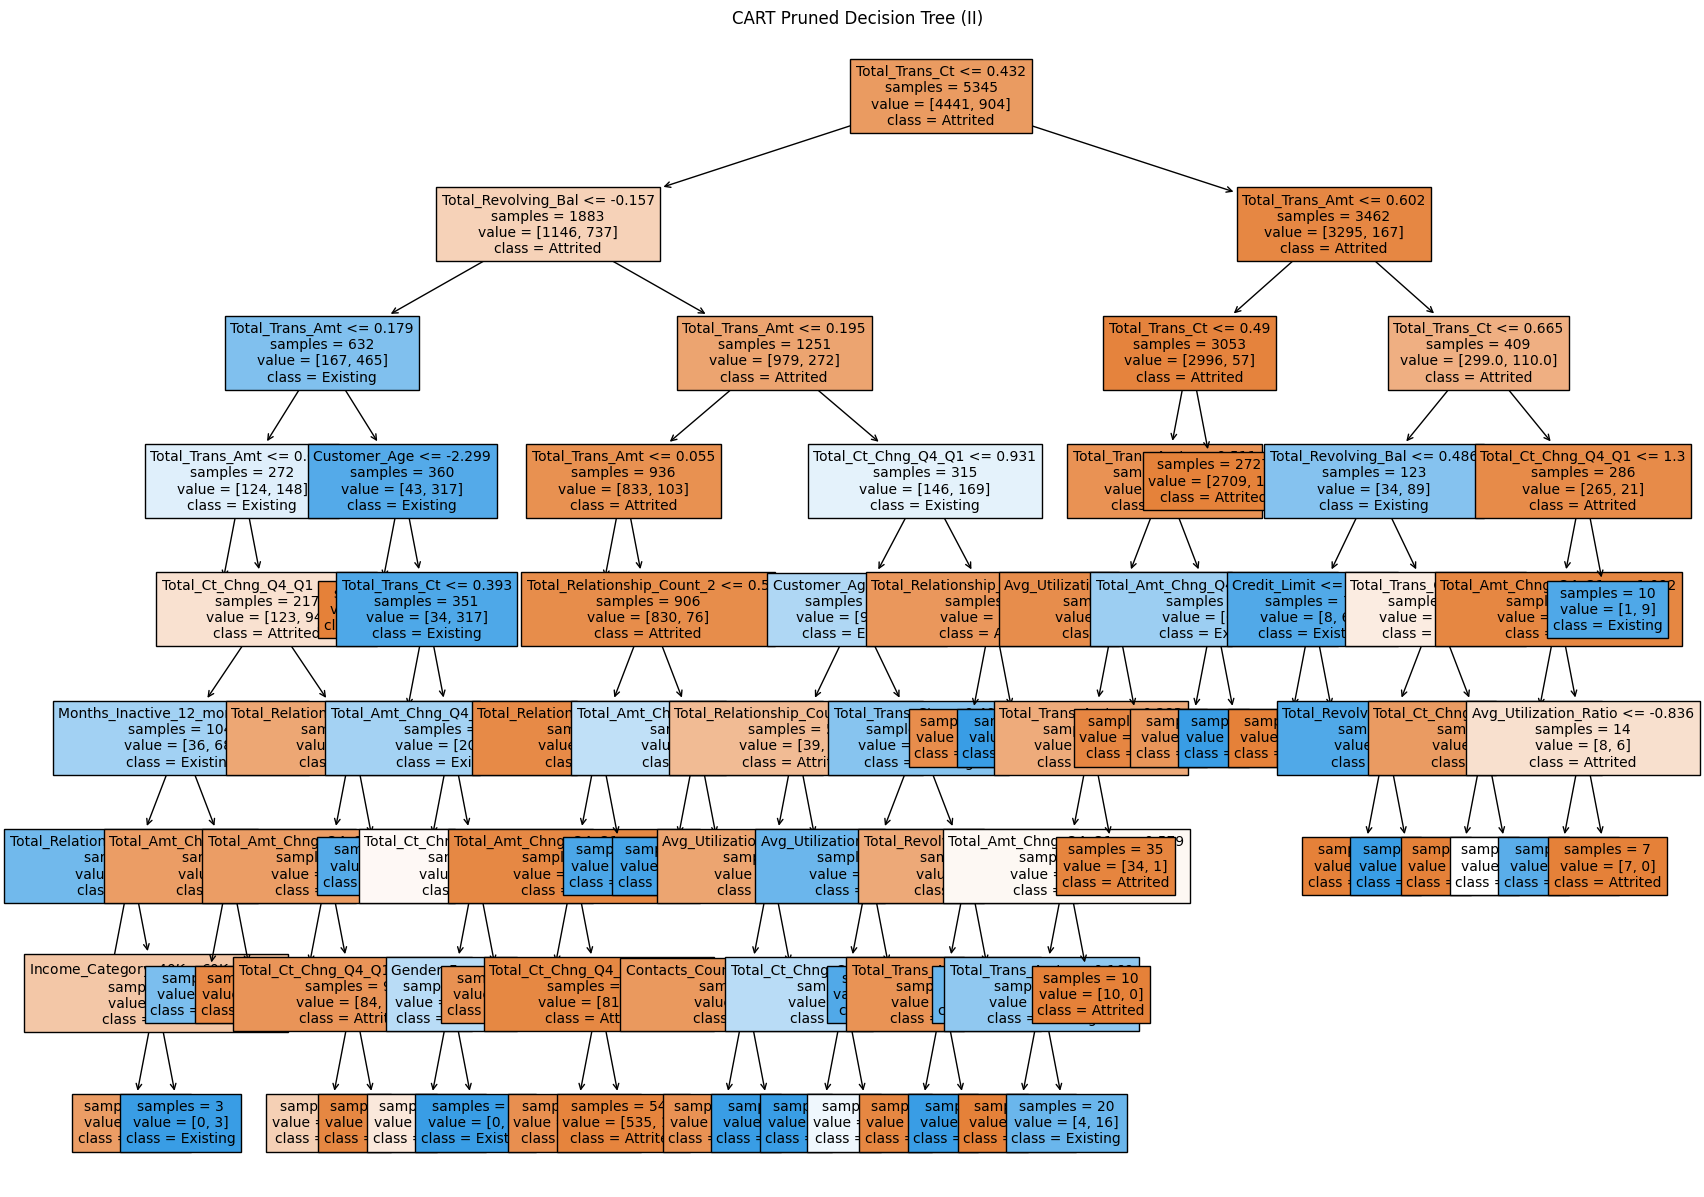

In [47]:
print(f"CART Pruned Decision Tree (II) Depth: {pruned_tree_II.get_depth()}")
print(f"Number of Leaves or Terminal Nodes: {pruned_tree_II.get_n_leaves()}")

# Set the size of the plot
fig, ax = plt.subplots(figsize=(20, 15))

# Plot the decision tree
plot = plot_tree(
    decision_tree = pruned_tree_II,  # Plotting the first tree in the forest
    feature_names = X_train.columns.tolist(),
    class_names = ['Attrited', 'Existing'],
    filled = True,
    impurity = False,
    fontsize = 10,
    ax = ax
)

# Add title and other customizations to match the style of your OOB error graph
ax.set_title("CART Pruned Decision Tree (II)", fontsize = 12)

# Show the plot
plt.show()

El árbol con mayor precisión es el primer podado `pruned_tree_I`, al presentar la mayor precisión en la matriz de confusión de test. Cabe mencionar que los árboles podados alcanzan una mejor precisión que el árbol sin podar.

## <span style="font-family: Latin Modern Roman; font-size: 23px;"> 5.2. Classification Report </span>

In [48]:
importance_predictors = pd.DataFrame(
                            {'predictor': X_train.columns,
                             'importance': pruned_tree_I.feature_importances_}
                            )
print("---------------------------------------------------------------------")
print("Importance  of the Model Predictors - CART Pruned Decision Tree)")
print("---------------------------------------------------------------------")
importance_predictors.sort_values('importance', ascending = False).head(5)

---------------------------------------------------------------------
Importance  of the Model Predictors - CART Pruned Decision Tree)
---------------------------------------------------------------------


predictor  importance
49        Total_Trans_Ct    0.333787
48       Total_Trans_Amt    0.213291
51   Total_Revolving_Bal    0.191276
46   Total_Ct_Chng_Q4_Q1    0.065255
45  Total_Amt_Chng_Q4_Q1    0.052198

In [49]:
from sklearn.metrics import classification_report
print(
    classification_report(
        y_true = y_test,
        y_pred = pruned_tree_I.predict(X_test)
    )
)

              precision    recall  f1-score   support

         0.0       0.96      0.97      0.97      1903
         1.0       0.85      0.81      0.83       388

    accuracy                           0.94      2291
   macro avg       0.91      0.89      0.90      2291
weighted avg       0.94      0.94      0.94      2291



In [50]:
# Churn Classification using CART Pruned Decision Tree with various thresholds
# ==============================================================================
cart_predictions = pd.DataFrame(data = pruned_tree_I.predict_proba(X = X_test), columns=['0', '1'])
cart_predictions['classification_default_0.5'] = np.where(cart_predictions['0'] > cart_predictions['1'], 0, 1)
cart_predictions['classification_custom_0.8'] = np.where(cart_predictions['1'] > 0.8, 1, 0)
cart_predictions['classification_custom_0.9'] = np.where(cart_predictions['1'] > 0.9, 1, 0)
cart_predictions.head(20)

0         1  classification_default_0.5  classification_custom_0.8  \
0   0.957746  0.042254                           0                          0   
1   0.857143  0.142857                           0                          0   
2   0.993399  0.006601                           0                          0   
3   0.967290  0.032710                           0                          0   
4   0.910714  0.089286                           0                          0   
5   0.993399  0.006601                           0                          0   
6   0.979853  0.020147                           0                          0   
7   0.993399  0.006601                           0                          0   
8   0.993399  0.006601                           0                          0   
9   0.993399  0.006601                           0                          0   
10  0.993399  0.006601                           0                          0   
11  0.993399  0.006601                           0                          0   
12  0.993399  0.006601                           0                          0   
13  0.979853  0.020147                           0                          0   
14  0.958333  0.041667                           0                          0   
15  0.954545  0.045455                           0                          0   
16  0.993399  0.006601                           0                          0   
17  0.993399  0.006601                           0                          0   
18  0.993399  0.006601                           0                          0   
19  0.993399  0.006601                           0                          0   

    classification_custom_0.9  
0                           0  
1                           0  
2                           0  
3                           0  
4                           0  
5                           0  
6                           0  
7                           0  
8                           0  
9                           0  
10                          0  
11                          0  
12                          0  
13                          0  
14                          0  
15                          0  
16                          0  
17                          0  
18                          0  
19                          0

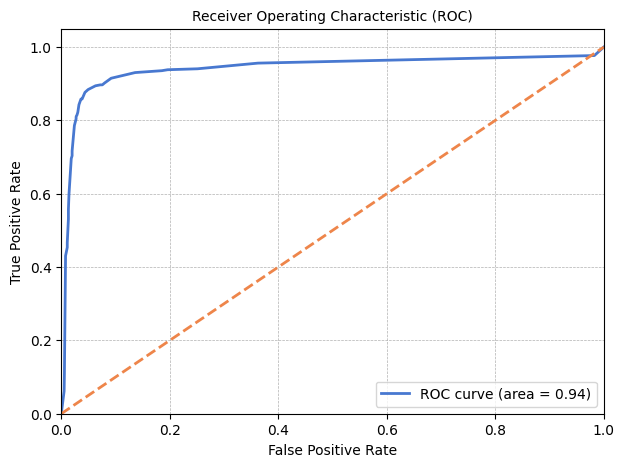

In [51]:
from sklearn.metrics import roc_curve, auc

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, cart_predictions['1'])
roc_auc = auc(fpr, tpr)

# Set the palette and style of the plot to match the given example
sns.set_palette("muted")

# Create the ROC curve plot with the same style
fig, ax = plt.subplots(figsize=(7, 5))
ax.plot(fpr, tpr, lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
ax.plot([0, 1], [0, 1], lw=2, linestyle='--')

# Customize the plot to match the given style (titles, labels, legend, grid)
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic (ROC)', fontsize=10)
ax.legend(loc="lower right")

# Use the grid style and linewidth as in the example
plt.grid(True, which="both", ls="--", linewidth=0.5)

# Show the plot
plt.show()


---

## <span style="font-family: Latin Modern Roman; font-size: 25px;"> 6. Ensemble - Random Forest </span>

## <span style="font-family: Latin Modern Roman; font-size: 23px;"> 6.1. Hiperparameter Search. Predictor Importance. Confusion Matrices</span>

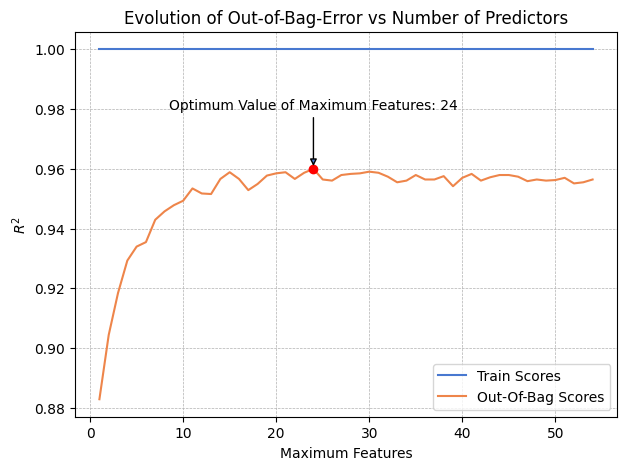

In [52]:
from sklearn.ensemble import RandomForestClassifier

# Defining number of features to use based on Out-of-Bag error
train_scores = []
oob_scores   = []

# Values to test for number of features
max_features_range = range(1, X_train.shape[1] + 1, 1)

# Loop for training a model for each value in max_features. It is obtained training error
# and Out-of-Bag.
for max_features in max_features_range:
    model = RandomForestClassifier(
                n_estimators = 100,
                criterion    = 'entropy',  # or 'gini'
                max_depth    = None,
                max_features = max_features,
                oob_score    = True,
                n_jobs       = -1,
                random_state = 42
             )
    model.fit(X_train, y_train)
    train_scores.append(model.score(X_train, y_train))
    oob_scores.append(model.oob_score_)
    
# Graphic with the evolution of errors
sns.set_palette("muted")

fig, ax = plt.subplots(figsize=(7, 5))
ax.plot(max_features_range, train_scores, label="Train Scores")
ax.plot(max_features_range, oob_scores, label="Out-Of-Bag Scores")
ax.plot(max_features_range[np.argmax(oob_scores)], max(oob_scores),
        marker='o', color = "red")
ax.annotate(f"Optimum Value of Maximum Features: {max_features_range[np.argmax(oob_scores)]}",
            xy=(max_features_range[np.argmax(oob_scores)], max(oob_scores)),
            xytext=(max_features_range[np.argmax(oob_scores)], max(oob_scores)+0.02),
            arrowprops={'arrowstyle': '-|>'}, ha='center')
ax.set_ylabel(r'$R^2$')
ax.set_xlabel("Maximum Features")
ax.set_title("Evolution of Out-of-Bag-Error vs Number of Predictors", fontsize = 12)
plt.legend()
plt.grid(True, which = "both", ls = "--", linewidth = 0.5)

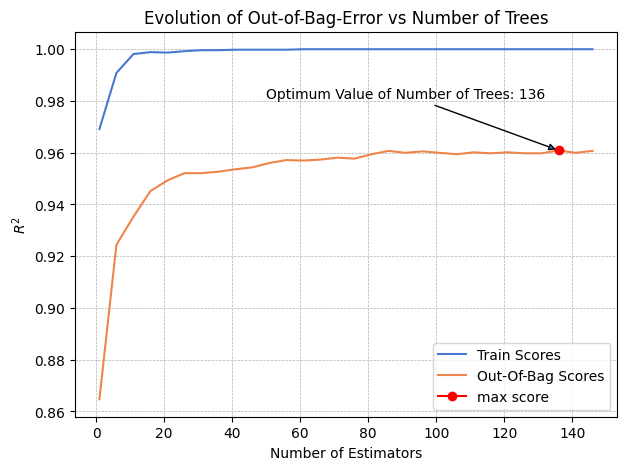

In [53]:
# Once  the number of estimators is know, the number of trees is found using Out-of-Bag error
train_scores = []
oob_scores   = []

# Valores evaluados
estimator_range = range(1, 150, 5)

# loop for training a model for each value in estimator_range 
# The training error and the Out-of-Bag are obtained.
for n_estimators in estimator_range:
    model = RandomForestClassifier(
                n_estimators = n_estimators,
                criterion    = 'entropy',
                max_depth    = None,
                max_features = 24,
                oob_score    = True,
                n_jobs       = -1,
                random_state = 42
             )
    model.fit(X_train, y_train)
    train_scores.append(model.score(X_train, y_train))
    oob_scores.append(model.oob_score_)
    
# Graphic with the evolution of errors
fig, ax = plt.subplots(figsize=(7, 5))
ax.plot(estimator_range, train_scores, label="Train Scores")
ax.plot(estimator_range, oob_scores, label="Out-Of-Bag Scores")
ax.plot(estimator_range[np.argmax(oob_scores)], max(oob_scores),
        marker='o', color = "red", label="max score")
ax.annotate(f"Optimum Value of Number of Trees: {estimator_range[np.argmax(oob_scores)]}",
            xy=(estimator_range[np.argmax(oob_scores)], max(oob_scores)),
            xytext=(estimator_range[np.argmax(oob_scores)]-45, max(oob_scores)+0.02),
            arrowprops={'arrowstyle': '-|>'}, ha = 'center')
ax.set_ylabel(r'$R^2$')
ax.set_xlabel("Number of Estimators")
ax.set_title("Evolution of Out-of-Bag-Error vs Number of Trees", fontsize = 12)
plt.legend()
plt.grid(True, which = "both", ls = "--", linewidth = 0.5)

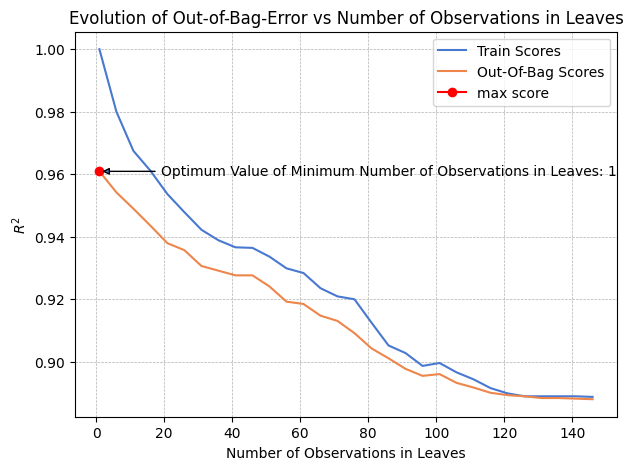

In [54]:
# Fitting the minimum number of observations in the leeaves of the trees using Out-of-Bag error
train_scores = []
oob_scores   = []

# Valores evaluados
obser_range = range(1, 150, 5)

# loop for training a model for each value in estimator_range 
# The training error and the Out-of-Bag are obtained.
for observ in obser_range:
    model = RandomForestClassifier(
                n_estimators = 136,
                criterion    = 'entropy',
                max_depth    = None,
                max_features = 24,
                min_samples_leaf = observ,
                oob_score    = True,
                n_jobs       = -1,
                random_state = 42
             )
    model.fit(X_train, y_train)
    train_scores.append(model.score(X_train, y_train))
    oob_scores.append(model.oob_score_)
    
# Gráfico con la evolución de los errores
fig, ax = plt.subplots(figsize=(7, 5))
ax.plot(obser_range, train_scores, label="Train Scores")
ax.plot(obser_range, oob_scores, label="Out-Of-Bag Scores")
ax.plot(obser_range[np.argmax(oob_scores)], max(oob_scores),
        marker='o', color = "red", label="max score")
ax.annotate(f"Optimum Value of Minimum Number of Observations in Leaves: {obser_range[np.argmax(oob_scores)]}",
            xy=(obser_range[np.argmax(oob_scores)], max(oob_scores)),
            xytext=(obser_range[np.argmax(oob_scores)]+18, max(oob_scores)),
            arrowprops={'arrowstyle': '-|>'}, va='center')
            
ax.set_ylabel(r'$R^2$')
ax.set_xlabel("Number of Observations in Leaves")
ax.set_title("Evolution of Out-of-Bag-Error vs Number of Observations in Leaves", fontsize = 12)
plt.legend()
plt.grid(True, which = "both", ls = "--", linewidth = 0.5)

In [55]:
# Model creation
rf_model = RandomForestClassifier(
            n_estimators = 136,  # number of trees
            criterion    = 'entropy',
            max_depth    = None,
            max_features = 24,
            min_samples_leaf = 1,
            oob_score    = True,
            n_jobs       = -1,
            random_state = 42
         )

# Training Random Forest
rf_model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_features=24, n_estimators=136,
                       n_jobs=-1, oob_score=True, random_state=42)

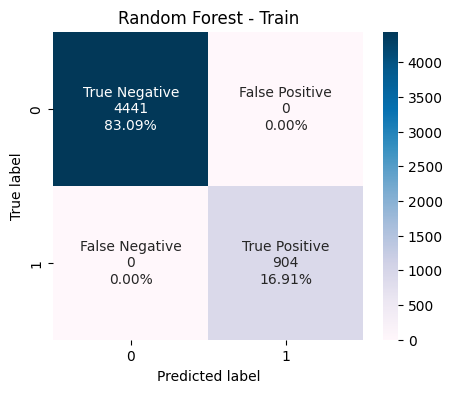

In [56]:
# Calculate the confusion matrix
cm = confusion_matrix(y_train, rf_model.predict(X_train), labels=rf_model.classes_)

# Define the group names and formats
group_names = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)

# Create the heatmap with custom labels
fig, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(cm, annot=labels, fmt='', cmap='PuBu', ax=ax)
ax.set_title('Random Forest - Train', fontsize = 12)
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')
plt.show()


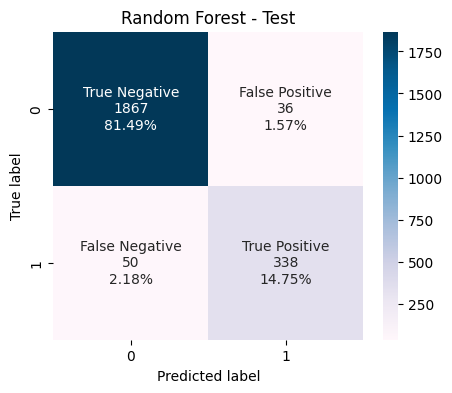

In [57]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, rf_model.predict(X_test), labels=rf_model.classes_)

# Define the group names and formats
group_names = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)

# Create the heatmap with custom labels
fig, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(cm, annot=labels, fmt='', cmap='PuBu', ax=ax)
ax.set_title('Random Forest - Test', fontsize = 12)
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')
plt.show()

In [58]:
# Grid to find hiperparameters
from sklearn.model_selection import ParameterGrid

param_grid = ParameterGrid(
                {'n_estimators': [20, 25, 50, 100, 150],
                'max_features': [5, 10, 15, 20, 25],
                'max_depth'   : [1, 5, 10, 15, 20],
                'criterion'   : ['gini', 'entropy']
                }
            )

results = {'params': [], 'oob_accuracy': []}

for params in param_grid:
    
    model = RandomForestClassifier(
                oob_score    = True,
                n_jobs       = -1,
                random_state = 42,
                ** params
             )
    
    model.fit(X_train, y_train)
    
    results['params'].append(params)
    results['oob_accuracy'].append(model.oob_score_)

# Results
results = pd.DataFrame(results)
results = pd.concat([results, results['params'].apply(pd.Series)], axis=1)
results = results.sort_values('oob_accuracy', ascending=False)
results = results.drop(columns = 'params')
results.head(10)

oob_accuracy criterion  max_depth  max_features  n_estimators
244      0.958653   entropy         20            20           150
219      0.958466   entropy         15            20           150
249      0.958279   entropy         20            25           150
243      0.958279   entropy         20            20           100
224      0.958092   entropy         15            25           150
99       0.957905      gini         15            25           150
199      0.957905   entropy         10            25           150
239      0.957530   entropy         20            15           150
68       0.957530      gini         10            20           100
89       0.957343      gini         15            15           150

In [59]:
# Better hyperparameters using out-of-bag error
print("---------------------------------------------------------------------")
print("Better Hyperparameters Found - Random Forest (OOB - Accuracy)")
print("---------------------------------------------------------------------")
print(results.iloc[0,0], ":", results.iloc[0,:]['oob_accuracy'], "accuracy")

---------------------------------------------------------------------
Better Hyperparameters Found - Random Forest (OOB - Accuracy)
---------------------------------------------------------------------
0.9586529466791394 : 0.9586529466791394 accuracy


In [60]:
# Model creation
rf_best_oob = RandomForestClassifier(
            n_estimators = 150,  # number of trees
            criterion    = 'entropy',
            max_depth    = 20,
            max_features = 20,
            oob_score    = True,
            n_jobs       = -1,
            random_state = 42
         )

# Training Random Forest
rf_best_oob.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=20, max_features=20,
                       n_estimators=150, n_jobs=-1, oob_score=True,
                       random_state=42)

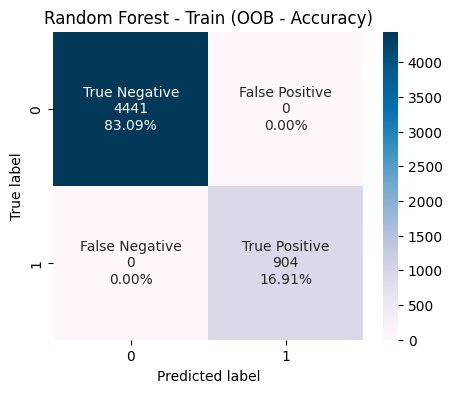

In [61]:
# Calculate the confusion matrix
cm = confusion_matrix(y_train, rf_best_oob.predict(X_train), labels=rf_best_oob.classes_)

# Define the group names and formats
group_names = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)

# Create the heatmap with custom labels
fig, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(cm, annot=labels, fmt='', cmap='PuBu', ax=ax)
ax.set_title('Random Forest - Train (OOB - Accuracy)', fontsize = 12)
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')
plt.show()

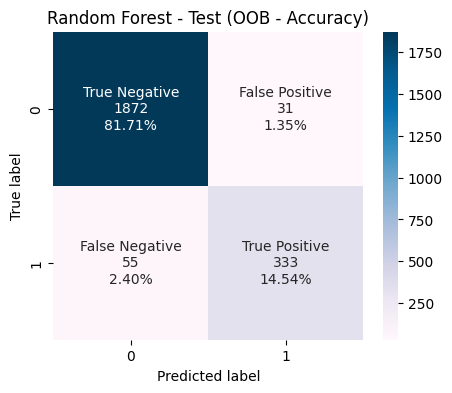

In [62]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, rf_best_oob.predict(X_test), labels=rf_best_oob.classes_)

# Define the group names and formats
group_names = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)

# Create the heatmap with custom labels
fig, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(cm, annot=labels, fmt='', cmap='PuBu', ax=ax)
ax.set_title('Random Forest - Test (OOB - Accuracy)', fontsize = 12)
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')
plt.show()

In [63]:
from sklearn.model_selection import RepeatedKFold

# Grid search based on cross-validation
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [20, 25, 50, 100, 150],
              'max_features': [5, 10, 15, 20, 25],
              'max_depth'   : [1, 5, 10, 15, 20],
            'criterion'   : ['gini', 'entropy']
             }

# Grid search by CV
grid = GridSearchCV(
        estimator  = RandomForestClassifier(random_state = 123),
        param_grid = param_grid,
        scoring    = 'accuracy',
        n_jobs     = - 1,
        cv         = RepeatedKFold(n_splits=5, n_repeats=3, random_state=123), 
        refit      = True,
        verbose    = 0,
        return_train_score = True
       )

grid.fit(X = X_train, y = y_train)

# Resultados
results_cv = pd.DataFrame(grid.cv_results_)
results_cv.filter(regex = '(param*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head(4)

param_criterion param_max_depth param_max_features param_n_estimators  \
224         entropy              15                 25                150   
244         entropy              20                 20                150   
223         entropy              15                 25                100   
249         entropy              20                 25                150   

     mean_test_score  std_test_score  mean_train_score  std_train_score  
224         0.958341        0.004399          1.000000         0.000000  
244         0.957780        0.004504          1.000000         0.000000  
223         0.957655        0.004354          0.999984         0.000058  
249         0.957655        0.003961          1.000000         0.000000

In [64]:
# Better hyperparameters using cv and out-of-bag error
print("---------------------------------------------------------------------")
print("Better hyperparameters found - Random Forest (Cross - Validation)")
print("---------------------------------------------------------------------")
print(grid.best_params_, ":", grid.best_score_, grid.scoring)

---------------------------------------------------------------------
Better hyperparameters found - Random Forest (Cross - Validation)
---------------------------------------------------------------------
{'criterion': 'entropy', 'max_depth': 15, 'max_features': 25, 'n_estimators': 150} : 0.958341128780792 accuracy


In [65]:
# Model creation
rf_cv = RandomForestClassifier(
            n_estimators = 150,  # number of trees
            criterion    = 'entropy',
            max_depth    = 15,
            max_features = 25,
            oob_score    = True,
            n_jobs       = -1,
            random_state = 42
         )

# Training Random Forest
rf_cv.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=15, max_features=25,
                       n_estimators=150, n_jobs=-1, oob_score=True,
                       random_state=42)

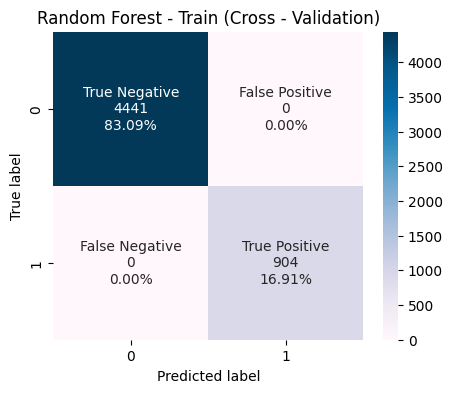

In [66]:
# Calculate the confusion matrix
cm = confusion_matrix(y_train, rf_cv.predict(X_train), labels=rf_cv.classes_)

# Define the group names and formats
group_names = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)

# Create the heatmap with custom labels
fig, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(cm, annot=labels, fmt='', cmap='PuBu', ax=ax)
ax.set_title('Random Forest - Train (Cross - Validation)', fontsize = 12)
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')
plt.show()

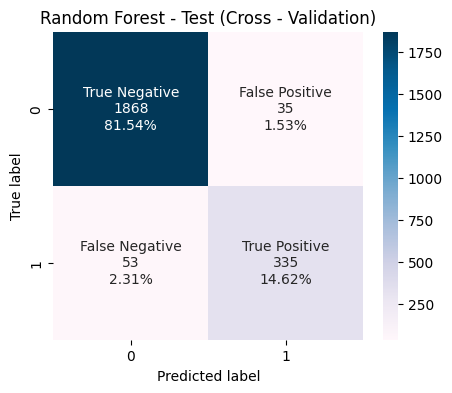

In [67]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, rf_cv.predict(X_test), labels=rf_cv.classes_)

# Define the group names and formats
group_names = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)

# Create the heatmap with custom labels
fig, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(cm, annot=labels, fmt='', cmap='PuBu', ax=ax)
ax.set_title('Random Forest - Test (Cross - Validation)', fontsize = 12)
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')
plt.show()

El mejor modelo alcanzado es `rf_model`, al presentar la mayor precisión en la matriz de confusión de test. No obstante, todos los Random Forest tienen precisiones muy similares. El modelo usado para buscar hiperparámetros con Grid Validation es quizás el mas descaconsejable por su elevado tiempo de búsqueda con respecto a los otros dos.

## <span style="font-family: Latin Modern Roman; font-size: 23px;"> 6.2. Classification Report </span>

In [68]:
importance_predictors = pd.DataFrame(
                            {'predictor': X_train.columns,
                             'importance': rf_model.feature_importances_}
                            )
print("---------------------------------------------------------------------")
print("Importance  of the Model Predictors - Random Forest")
print("---------------------------------------------------------------------")
importance_predictors.sort_values('importance', ascending = False).head(5)

---------------------------------------------------------------------
Importance  of the Model Predictors - Random Forest
---------------------------------------------------------------------


predictor  importance
48      Total_Trans_Amt    0.257373
49       Total_Trans_Ct    0.213927
50  Total_Revolving_Bal    0.073842
51  Total_Revolving_Bal    0.073367
46  Total_Ct_Chng_Q4_Q1    0.067842

In [69]:
from sklearn.metrics import classification_report
print(
    classification_report(
        y_true = y_test,
        y_pred = rf_model.predict(X_test)
    )
)

              precision    recall  f1-score   support

         0.0       0.97      0.98      0.98      1903
         1.0       0.90      0.87      0.89       388

    accuracy                           0.96      2291
   macro avg       0.94      0.93      0.93      2291
weighted avg       0.96      0.96      0.96      2291



In [70]:
# Churn Classification using Random Forest with various thresholds
# ==============================================================================
rf_predictions = pd.DataFrame(data = rf_model.predict_proba(X = X_test), columns=['0', '1'])
rf_predictions['classification_default_0.5'] = np.where(rf_predictions['0'] > rf_predictions['1'], 0, 1)
rf_predictions['classification_custom_0.8'] = np.where(rf_predictions['1'] > 0.8, 1, 0)
rf_predictions['classification_custom_0.9'] = np.where(rf_predictions['1'] > 0.9, 1, 0)
rf_predictions.head(20)

0         1  classification_default_0.5  classification_custom_0.8  \
0   0.875000  0.125000                           0                          0   
1   0.294118  0.705882                           1                          0   
2   1.000000  0.000000                           0                          0   
3   0.955882  0.044118                           0                          0   
4   0.911765  0.088235                           0                          0   
5   0.963235  0.036765                           0                          0   
6   0.977941  0.022059                           0                          0   
7   1.000000  0.000000                           0                          0   
8   1.000000  0.000000                           0                          0   
9   1.000000  0.000000                           0                          0   
10  1.000000  0.000000                           0                          0   
11  0.911765  0.088235                           0                          0   
12  0.992647  0.007353                           0                          0   
13  0.889706  0.110294                           0                          0   
14  0.963235  0.036765                           0                          0   
15  0.727941  0.272059                           0                          0   
16  0.985294  0.014706                           0                          0   
17  1.000000  0.000000                           0                          0   
18  0.985294  0.014706                           0                          0   
19  1.000000  0.000000                           0                          0   

    classification_custom_0.9  
0                           0  
1                           0  
2                           0  
3                           0  
4                           0  
5                           0  
6                           0  
7                           0  
8                           0  
9                           0  
10                          0  
11                          0  
12                          0  
13                          0  
14                          0  
15                          0  
16                          0  
17                          0  
18                          0  
19                          0

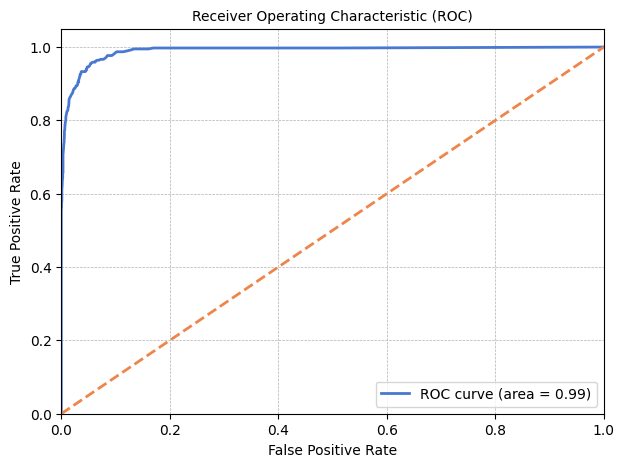

In [71]:
from sklearn.metrics import roc_curve, auc

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, rf_predictions['1'])
roc_auc = auc(fpr, tpr)

# Set the palette and style of the plot to match the given example
sns.set_palette("muted")

# Create the ROC curve plot with the same style
fig, ax = plt.subplots(figsize=(7, 5))
ax.plot(fpr, tpr, lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
ax.plot([0, 1], [0, 1], lw=2, linestyle='--')

# Customize the plot to match the given style (titles, labels, legend, grid)
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic (ROC)', fontsize=10)
ax.legend(loc="lower right")

# Use the grid style and linewidth as in the example
plt.grid(True, which="both", ls="--", linewidth=0.5)

# Show the plot
plt.show()


---

## <span style="font-family: Latin Modern Roman; font-size: 25px;"> 7. Clustering </span>

## <span style="font-family: Latin Modern Roman; font-size: 23px;"> 7.1. Number of Clusters</span>

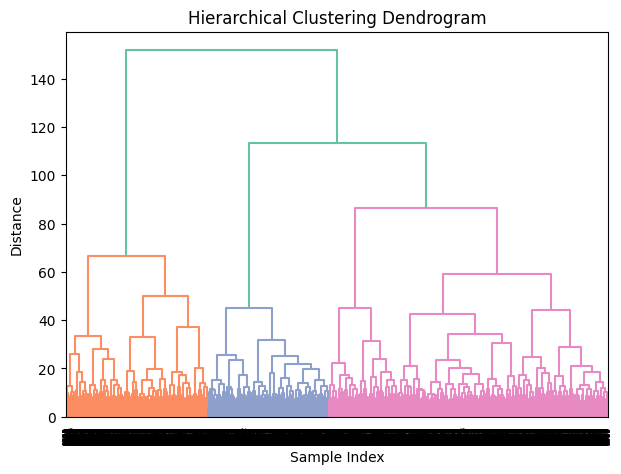

In [72]:
from scipy.cluster.hierarchy import dendrogram, linkage

linkage_data = linkage(df_scaled, method = 'ward', metric = 'euclidean')

sns.set_palette('Set2')
fig, ax = plt.subplots(figsize=(7, 5))
dendrogram(linkage_data)
ax.set_title("Hierarchical Clustering Dendrogram", fontsize = 12)
ax.set_xlabel('Sample Index')
ax.set_ylabel('Distance')
plt.show()

In [73]:
from sklearn.cluster import KMeans
Ks = range(2, 20)
# inertia = distorsion
kmeans_per_k = [KMeans(n_clusters = k, n_init = 10, random_state = 42).fit(df_scaled) for k in Ks]
inertias = [model.inertia_ for model in kmeans_per_k]

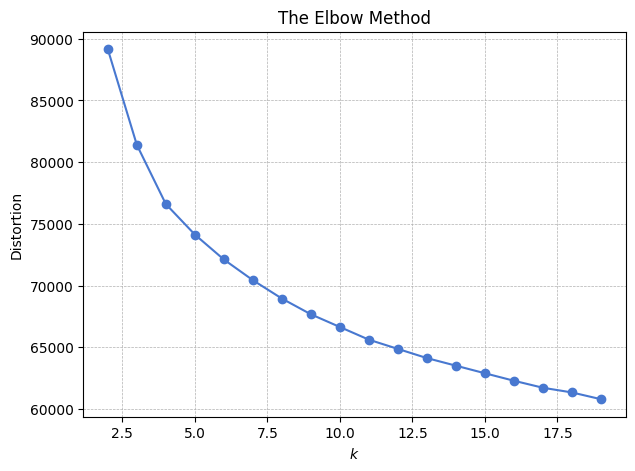

In [74]:
sns.set_palette('muted')

fig, ax = plt.subplots(figsize=(7, 5))
ax.plot(Ks, inertias, "o-")
ax.set_xlabel("$k$")
ax.set_ylabel("Distortion")
ax.set_title("The Elbow Method", fontsize = 12)
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.show()

<div style="text-align: justify;">

El **Método del codo** utiliza el cambio de pendiente para indicar un número potencialmente interesante de grupos. En este caso parece haber un cambio de pendiente entre 3 y 4 clusters.
</div>

In [75]:
from sklearn.metrics import silhouette_score

silhouette_scores = [silhouette_score(df_scaled, model.labels_) for model in kmeans_per_k]

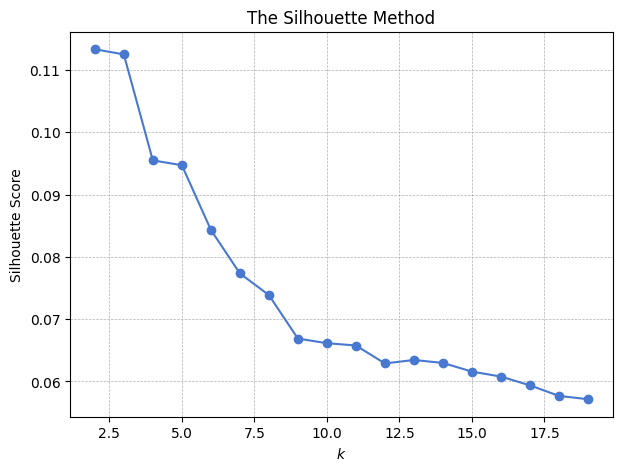

In [76]:
fig, ax = plt.subplots(figsize=(7, 5))
ax.plot(Ks, silhouette_scores, "o-")
ax.set_xlabel("$k$")
ax.set_ylabel("Silhouette Score")
ax.set_title("The Silhouette Method", fontsize = 12)
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.show()

<div style="text-align: justify;">

El **Método de la Silueta** mide qué tan similar es un punto a su propio grupo en comparación con otros grupos y calcula un coeficiente. Cuanto mayor sea el coeficiente final, más óptimo será el número de conglomerados. Los coeficientes más altos para el caso se alcanzan en 3 clusters nuevamente.
</div>

## <span style="font-family: Latin Modern Roman; font-size: 23px;"> 7.2. Principal Component Analysis (PCA)</span>

<div style="text-align: justify;">

El número de clusters idóneo es equivalente a 3. Sin embargo, la clase a predecir tiene 2 valores, si el cliente sigue manteniendo la tarjeta de crédito o no, siendo una salida binaria. Se hace un análisis para ver las características y la distribución de los clientes en los clusters fijados.

Por otra parte, dada el gran número de columnas y la alta dimensionalidad del dataset, se aplica PCA para reducir el número de dimensiones a 2, con el objetivo de visualizar la distribución de los clusters en gráficos 2D.

</div>

In [77]:
from sklearn.decomposition import PCA

# Reduce dimensions to 2D for visualization
pca = PCA(n_components = 2)
df_scaled_pca = pca.fit_transform(df_scaled)


## <span style="font-family: Latin Modern Roman; font-size: 23px;"> 7.3. Clustering Distribution</span>

<div style="text-align: justify;">

La agrupación aglomerativa, a diferencia de KMeans, puede manejar grupos no esféricos y de diferentes tamaños. Proporciona una jerarquía de grupos, que puede ser útil para análisis posteriores
</div>

In [78]:
from sklearn.cluster import AgglomerativeClustering

clustering_model = AgglomerativeClustering(n_clusters = 3, metric = 'euclidean', linkage = 'ward')
clustering_model.fit(df_scaled_pca)
clusters = clustering_model.labels_
clusters

array([1, 2, 1, ..., 1, 1, 1])

In [79]:
import collections

print(collections.Counter(clusters))

Counter({1: 3227, 0: 2258, 2: 2151})


In [80]:
df_clusters = df.copy()
df_clusters["Cluster"] = clusters

df_clusters.head()

Attrition_Flag  Customer_Age Gender  Dependent_count Education_Level  \
10  Existing Customer            42      M                5      Uneducated   
14  Existing Customer            57      F                2        Graduate   
20  Existing Customer            47      M                1       Doctorate   
21  Attrited Customer            62      F                0        Graduate   
23  Existing Customer            47      F                4         Unknown   

   Marital_Status Income_Category Card_Category  Months_on_book  \
10        Unknown         $120K +          Blue              31   
14        Married  Less than $40K          Blue              48   
20         Single     $60K - $80K          Blue              42   
21        Married  Less than $40K          Blue              49   
23         Single  Less than $40K          Blue              36   

    Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
10                         5                       3                      2   
14                         5                       2                      2   
20                         5                       2                      0   
21                         2                       3                      3   
23                         3                       3                      2   

    Credit_Limit  Total_Revolving_Bal  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  \
10        6748.0                 1467                 0.831             1201   
14        2436.0                  680                 1.190             1570   
20       20979.0                 1800                 0.906             1178   
21        1438.3                    0                 1.047              692   
23        2492.0                 1560                 0.573             1126   

    Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  Cluster  
10              42                0.680                  0.217        1  
14              29                0.611                  0.279        2  
20              27                0.929                  0.086        1  
21              16                0.600                  0.000        2  
23              23                0.353                  0.626        0

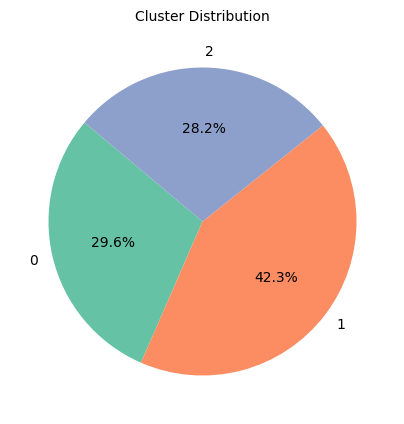

In [81]:
# Count of each cluster
cluster_counts = df_clusters["Cluster"].value_counts().sort_index()

sns.set_palette('Set2')

# Pie Plot
fig, ax = plt.subplots(figsize=(5, 5))
ax.pie(cluster_counts, labels=cluster_counts.index, autopct='%1.1f%%', startangle=140)
ax.set_title('Cluster Distribution', fontsize = 10)
plt.show()

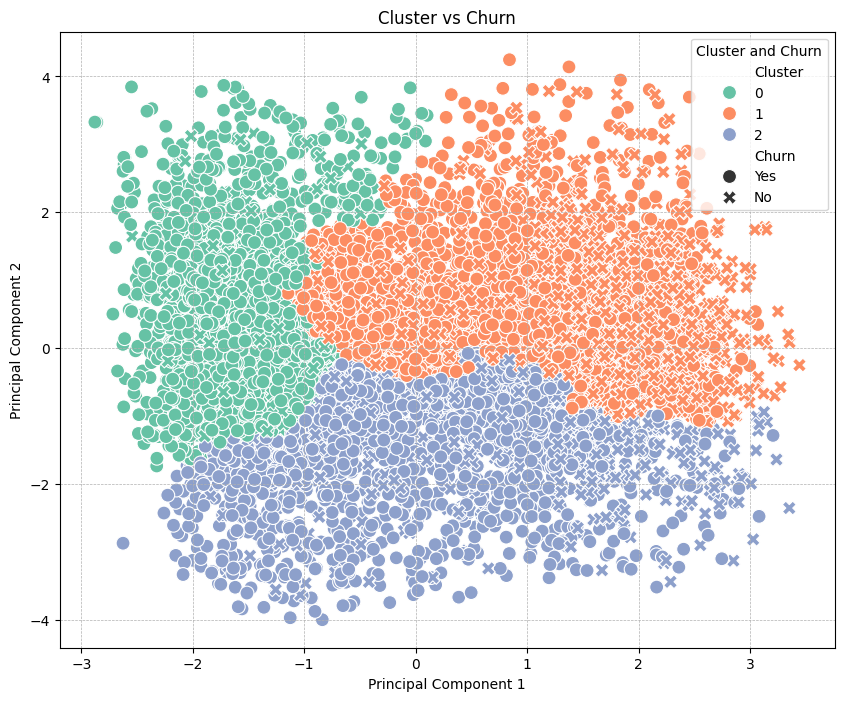

In [82]:
df_plot = pd.DataFrame(df_scaled_pca, columns=['PCA1', 'PCA2'])
df_plot['Cluster'] = clusters
df_plot['Churn'] = y.apply(lambda x: 'No' if x == 1 else 'Yes')

# Plot
fig, ax = plt.subplots(figsize=(10, 8))
sns.scatterplot(data = df_plot, x = 'PCA1', y = 'PCA2', hue = 'Cluster', style = 'Churn', palette = 'Set2', s = 100, ax=ax)

ax.set_title('Cluster vs Churn', fontsize = 12)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
plt.legend(title='Cluster and Churn', loc='best')
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.show()

## <span style="font-family: Latin Modern Roman; font-size: 23px;"> 7.4. Clustering Analysis</span>

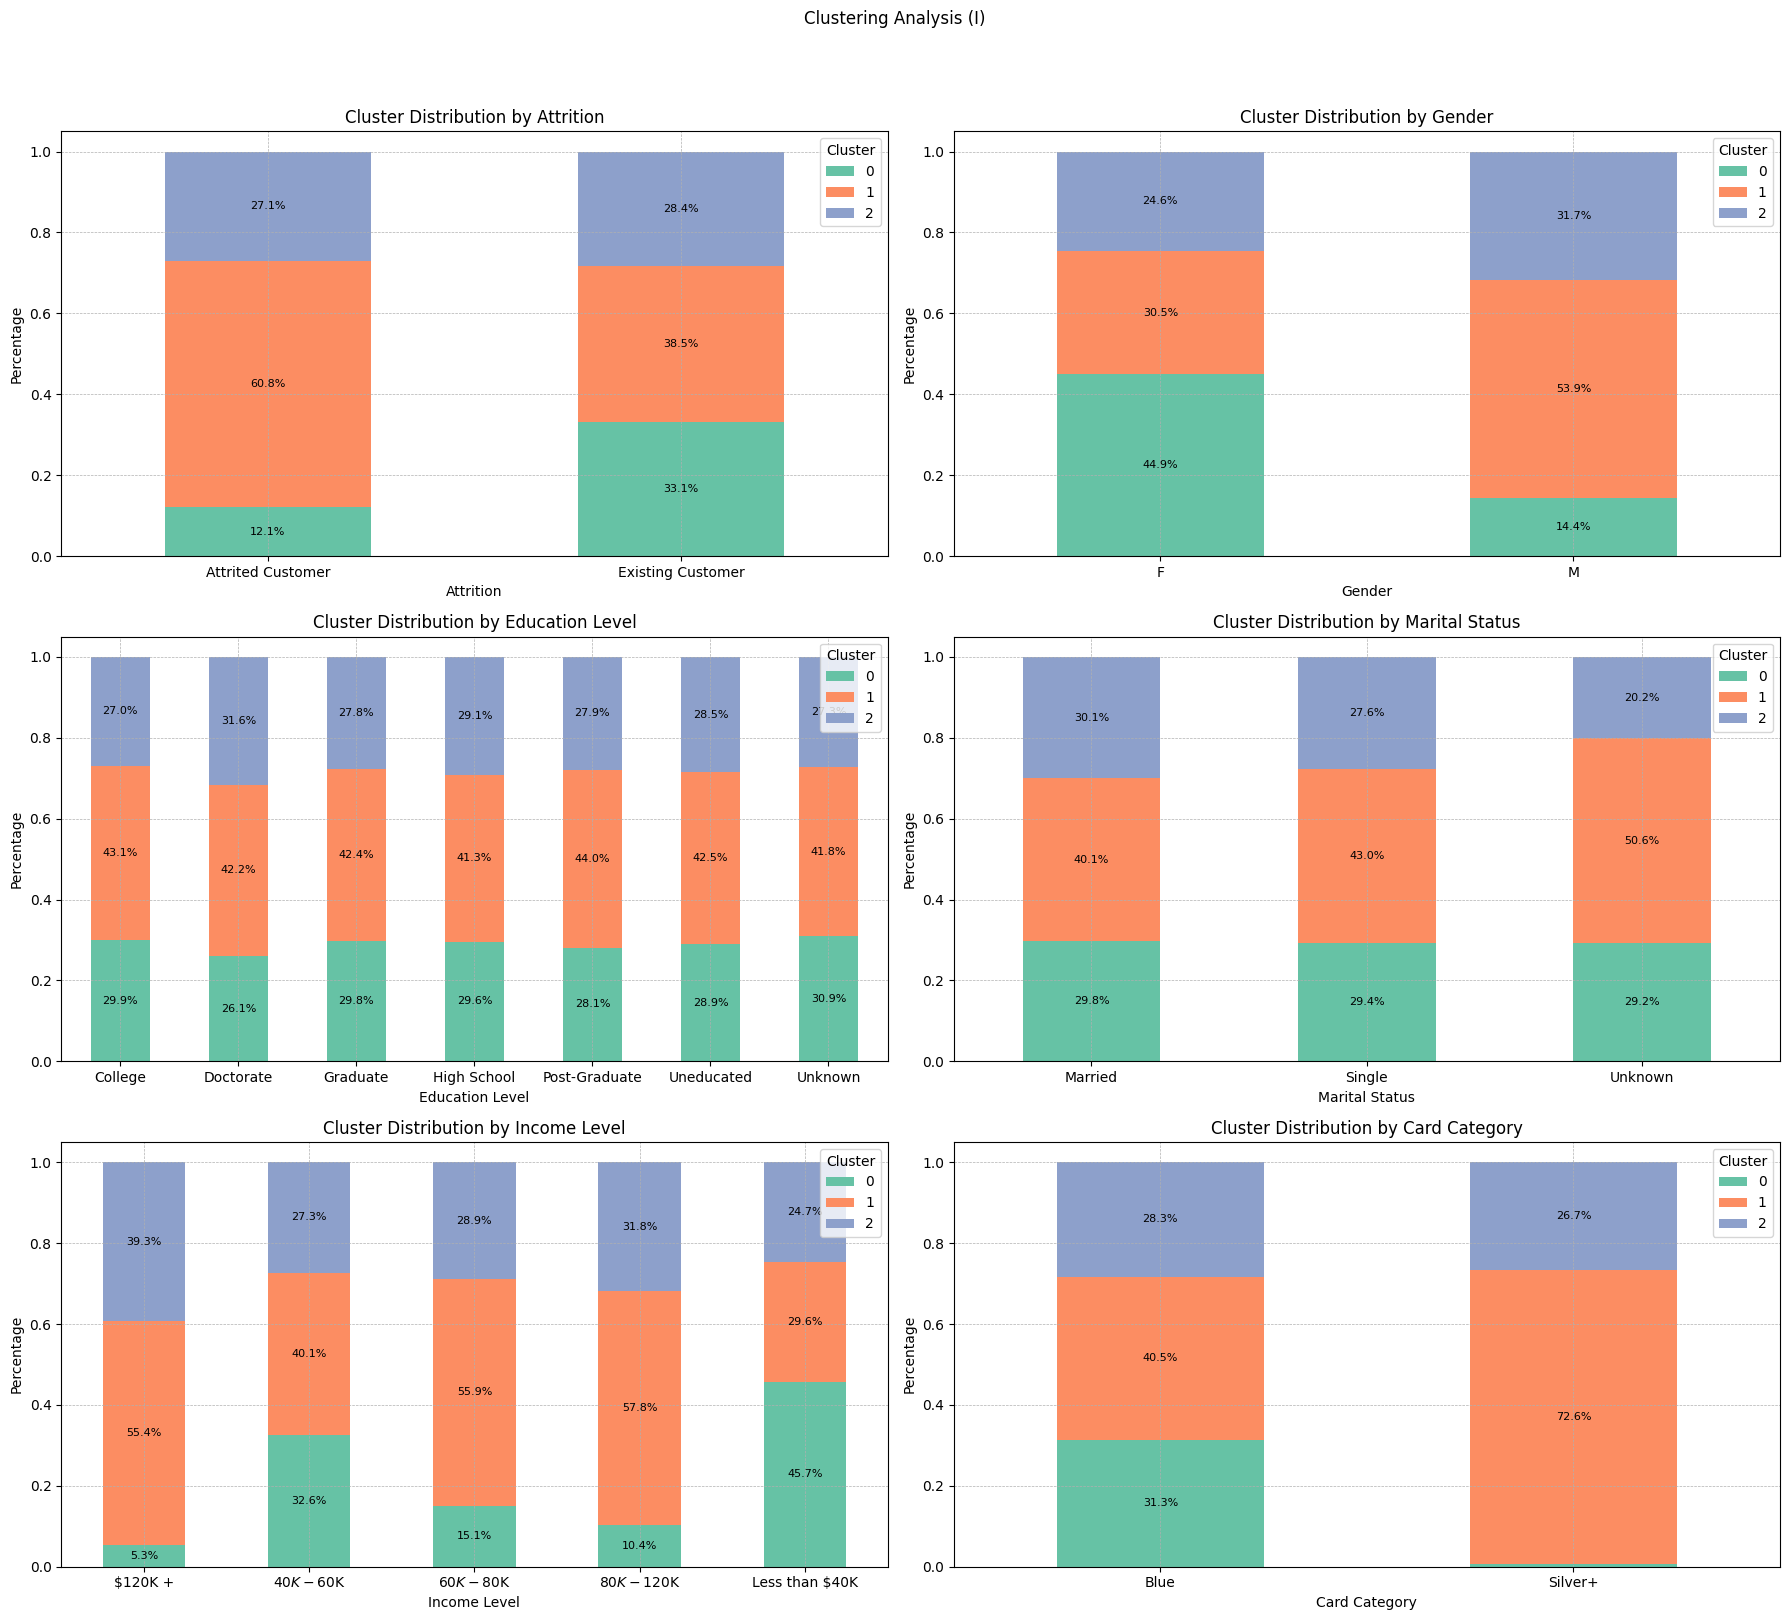

In [83]:
def prepare_stacked_bar_data(df, category_col, cluster_col):
    # Calculate the count of each group
    group_size = df.groupby([category_col, cluster_col]).size().unstack(fill_value=0)
    # Calculate the percentage of each category within each cluster
    percentage_data = group_size.divide(group_size.sum(axis=1), axis=0)
    return percentage_data

def plot_stacked_bar(data, ax, title, xlabel):
    # Plotting the data
    data.plot(kind = 'bar', stacked = True, ax = ax, color = sns.color_palette("Set2"))
 
    # Adding annotations
    for bar in ax.patches:
        bar_x = bar.get_x() + bar.get_width() / 2
        bar_y = bar.get_y() + bar.get_height() / 2
        percentage = f'{bar.get_height() * 100:.1f}%'
        if bar.get_height() > 0.01:  # This filters out the negligible percentages
            ax.text(bar_x, bar_y, percentage, ha = 'center', va = 'center', fontsize = 8, color = 'black')

    # Setting chart title and labels
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel('Percentage')
    ax.grid(True, which="both", ls="--", linewidth=0.5)
    ax.tick_params(axis = 'x', labelrotation=0)

fig, axes = plt.subplots(3, 2, figsize=(18, 17))
fig.suptitle('Clustering Analysis (I)')

# Creating subplots for each category
for i, (col, name) in enumerate(nominal_categories.items()):
    ax = axes[i//2, i%2]
    percentage_data = prepare_stacked_bar_data(df_clusters, col, 'Cluster')
    plot_stacked_bar(percentage_data, ax, f'Cluster Distribution by {name}', name)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


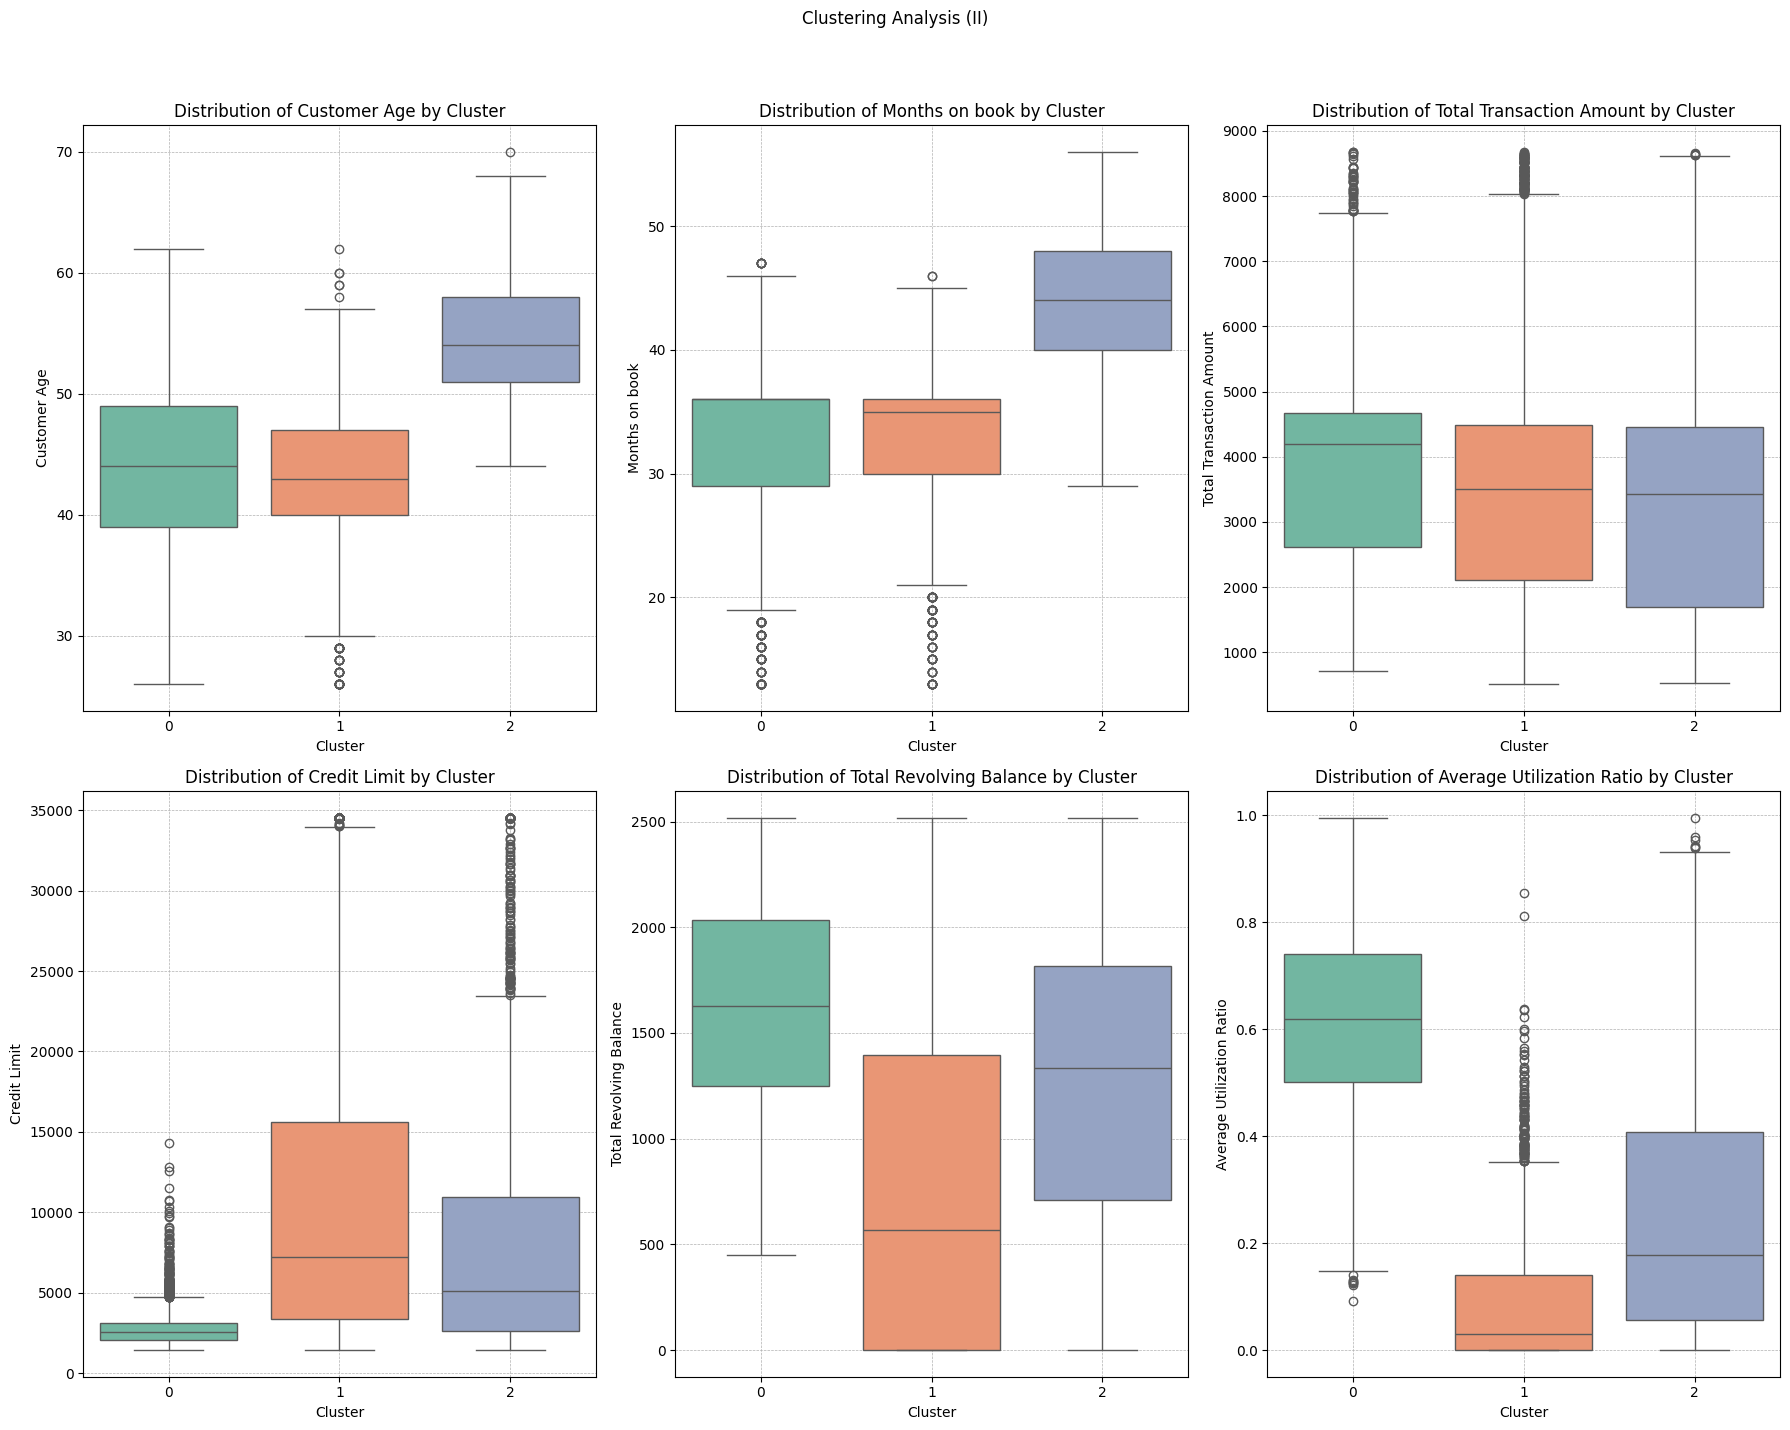

In [84]:
numerical_categories = {
    'Customer_Age': 'Customer Age',
    'Months_on_book': 'Months on book',
    'Total_Trans_Amt': 'Total Transaction Amount',
    'Credit_Limit': 'Credit Limit',
    'Total_Revolving_Bal': 'Total Revolving Balance',
    'Avg_Utilization_Ratio': 'Average Utilization Ratio'
}

# Creating the figure and axes for a 2x3 subplot grid
fig, axes = plt.subplots(2, 3, figsize=(18, 15))
fig.suptitle('Clustering Analysis (II)')

# Loop over the dictionary items and create a boxplot for each category
for i, (column_key, column_name) in enumerate(numerical_categories.items()):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    sns.boxplot(x = 'Cluster', y = column_key, data = df_clusters, ax = ax, palette = "Set2")
    ax.set_title(f'Distribution of {column_name} by Cluster')
    ax.set_xlabel('Cluster')
    ax.set_ylabel(column_name)
    ax.grid(True, which="both", ls="--", linewidth=0.5)

# Adjust layout to prevent overlap and to allocate space for titles and legends
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


---

## <span style="font-family: Latin Modern Roman; font-size: 25px;"> 8. Neural Networks </span>

## <span style="font-family: Latin Modern Roman; font-size: 23px;"> 8.1. Multi-Layer Perceptron (MLP)</span>

In [104]:
from sklearn.neural_network import MLPClassifier

# Define a list of different hidden layer sizes to try
hidden_layer_sizes_list = [
    (5,),
    (10,),
    (10, 5),
    (10, 10),
    (20,),
    (20, 5),
    (20, 10),
    (20, 20)
]

mlp_sgd_models = []
model_sgd_scores = {}

# Loop over each hidden layer size configuration
for i, hidden_layer_sizes in enumerate(hidden_layer_sizes_list, start=1):
    mlp_model = MLPClassifier(
        hidden_layer_sizes = hidden_layer_sizes,
        learning_rate_init = 0.01,
        solver = 'sgd',
        max_iter = 1000,
        random_state = 42
    )
    
    # Fit the model and store it in the list
    mlp_model.fit(X_train, y_train)
    mlp_sgd_models.append(mlp_model)
    
    # Store the training score or any other metric you want to track
    model_sgd_scores[f'Model {i}: {hidden_layer_sizes} Neurons'] = mlp_model.score(X_train, y_train)

# Print out the scores for comparison
for model_name, score in model_sgd_scores.items():
    print(f'{model_name} - Training Score: {score}')


Model 1: (5,) Neurons - Training Score: 0.9337698783910197
Model 2: (10,) Neurons - Training Score: 0.9534144059869036
Model 3: (10, 5) Neurons - Training Score: 0.9487371375116932
Model 4: (10, 10) Neurons - Training Score: 0.9554724041159962
Model 5: (20,) Neurons - Training Score: 0.9760523854069224
Model 6: (20, 5) Neurons - Training Score: 0.987464920486436
Model 7: (20, 10) Neurons - Training Score: 0.99644527595884
Model 8: (20, 20) Neurons - Training Score: 0.9953227315247896


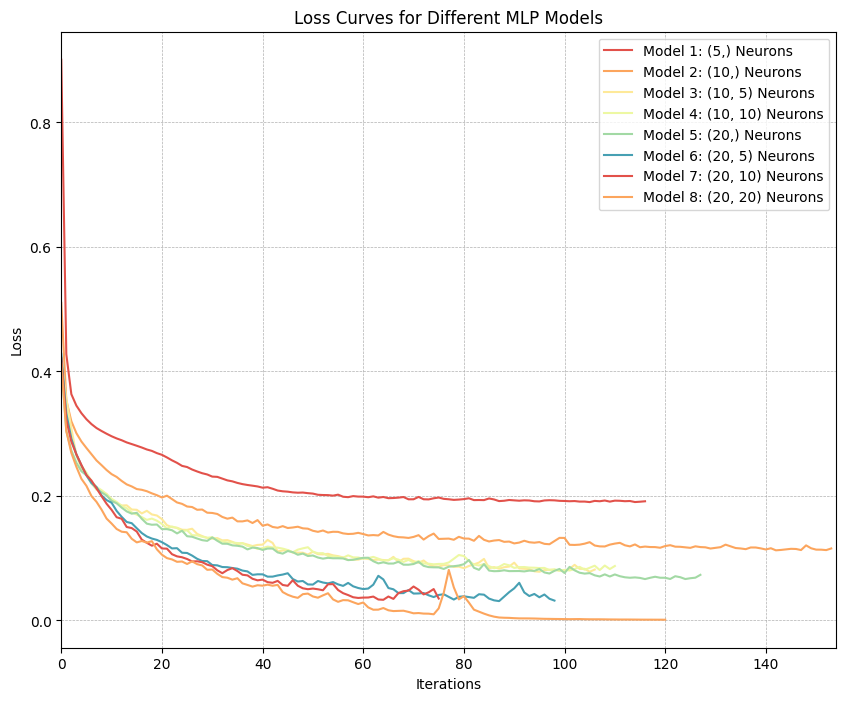

In [114]:
# Find the maximum number of iterations one of the models ran
max_iterations = max(len(model.loss_curve_) for model in mlp_sgd_models)

sns.set_palette("Spectral")

# Set up the plot
fig, ax = plt.subplots(figsize=(10, 8))
for i, mlp_model in enumerate(mlp_sgd_models, start=1):
    # Plot the loss curve using the 'loss_curve_' attribute
    ax.plot(mlp_model.loss_curve_, label = f'Model {i}: {mlp_model.hidden_layer_sizes} Neurons')

ax.set_title('Loss Curves for Different MLP Models', fontsize = 12)
ax.set_xlabel('Iterations')
ax.set_ylabel('Loss')
ax.set_xlim(0, max_iterations)  # Set the x-axis limits to be uniform across all plots
plt.legend()
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.show()



HACER GridSearchCV Y RandomizedSearchCV PARA BUSCAR MEJORES PARAMETROS CON SOLVER ADAM. HACER PLOTS DE LEARNING CUREVES Y LOSS CURVES. 

HACER CONFUSIONES
HACER PLOT DE PCA PARA OBSERVAR DECISION BOUNDARIES 